# Setup & Imports

In [2]:
# ------------------ Data Manipulation ------------------
import pandas as pd          # DataFrame operations
import numpy as np           # Numerical computations

# ------------------ Visualization ------------------
import matplotlib.pyplot as plt  # Basic plotting
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
# import seaborn as sns             # Statistical visualization

# ------------------ Statistics & Analysis ------------------
from scipy.stats import pearsonr    # Pearson correlation
import scipy.stats as stats         # General statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ------------------ Machine Learning & Scaling ------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalization and standardization
from sklearn.cluster import KMeans                              # KMeans clustering
from sklearn.preprocessing import PolynomialFeatures            # Polynomial basis for regression
from sklearn.linear_model import LinearRegression               # Linear regression model

# ------------------ Optimization & Pareto Analysis ------------------
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting  # Pareto front identification

# ------------------ Geospatial Analysis ------------------
import geopandas as gpd         # Handling shapefiles and spatial data
import fiona                    # I/O support for geospatial formats
import pyogrio                  # Fast I/O for vector geodata
import rasterio                 # Raster data reading/writing
from rasterstats import zonal_stats  # Zonal statistics from rasters

# ------------------ Utility & System ------------------
import os                # File system interaction
import warnings          # Suppress warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# ------------------ Pandas Display Settings ------------------
pd.options.display.float_format = '{:.2f}'.format         # Format float output
pd.set_option('display.max_columns', None)                # Show all columns

# ------------------ Matplotlib Settings ------------------
plt.rcParams['font.sans-serif'] = ['Arial']              # Support Chinese characters
plt.rcParams['axes.unicode_minus'] = False                # Display minus signs correctly

# Inline plot display (only needed in notebooks)
%matplotlib inline
from scipy.interpolate import RBFInterpolator

# Data preprocess

In [3]:
df = pd.read_csv('../data/grid500_36cities.csv')
grid500 = df.copy()
print(grid500.shape)
grid500.head()

(196770, 47)


Global_ID     City  NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
0          0  Beijing     6.18           7.03    1649.86               0.00   
1          1  Beijing     5.74           7.23     155.86               0.00   
2          2  Beijing    11.32          13.62      57.14               0.00   
3          3  Beijing    11.73          14.36     243.57               0.00   
4          4  Beijing     8.45           9.19       0.00               0.00   

   buildingCount  totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
0             31        93.00       3.00       3.00       3.00         0.00   
1             29        87.00       3.00       3.00       3.00         0.00   
2             22        66.00       3.00       3.00       3.00         0.00   
3              8        24.00       3.00       3.00       3.00         0.00   
4              0         0.00       0.00       0.00       0.00         0.00   

   heightIndex  heightDensity  heightVariety  cornerCountTotal  \
0         0.03           0.00           0.00               180   
1         0.03           0.00           0.00               149   
2         0.05           0.00           0.00               117   
3         0.12           0.00           0.00                42   
4         0.00           0.00           0.00                 0   

   basePerimeterTotal  basePerimeterAvg  basePerimeterMax  basePerimeterMin  \
0             6500.98            209.71            831.63             32.55   
1             3810.39            131.39            272.14             15.33   
2             3645.40            165.70            668.26             28.73   
3             1147.60            143.45            283.01             75.66   
4                0.00              0.00              0.00              0.00   

   shapeComplexity  compactness  baseAreaTotal  totalArea  areaVariance  \
0             5.07         0.56       88704.58   88704.58   50961857.70   
1             5.17         0.62       33119.49   33119.49    1261729.88   
2             4.92         0.56       51092.86   51092.86   30358745.83   
3             5.70         0.60        8534.61    8534.61     958399.89   
4             0.00         0.00           0.00       0.00          0.00   

   avgBuildingArea  parcelArea  largestPatchIndex  shape3DIndex  SVF  \
0          2861.44   132998.25               0.47          0.01 0.80   
1          1142.05   196625.22               0.67          0.26 0.89   
2          2322.40   132197.31               0.53          0.01 0.90   
3          1066.83   205685.37               0.82          0.02 0.95   
4             0.00       99.15               0.00          0.00 0.98   

   balanceIndex  FAR  coverageRatio  FVC  permeableRatio  poiDensity  \
0        234.60 0.35           0.35 0.84            0.89        4.00   
1         35.66 0.13           0.13 0.86            0.94       12.00   
2        151.50 0.20           0.20 0.88            0.93        0.00   
3         15.54 0.03           0.03 0.93            0.98        0.00   
4          0.00 0.00           0.00 0.82            0.98       16.00   

   poiDiversity  streetRatio  roadDensity  intersectionDensity  \
0          0.00         0.20            5                    1   
1          0.64         0.20            7                    1   
2          0.00         0.20            1                    0   
3          0.00         0.20            3                    1   
4          0.69         0.00            1                    1   

   cornerCountAvg  buildingProximity  buildingMinDist  buildingMaxDist  \
0            5.81              52.56            14.99           620.94   
1            5.14              34.22             6.82           594.16   
2            5.32              47.90            17.34           610.84   
3            5.25              35.93            13.49           474.17   
4            0.00               0.00             0.00             0.00   

   buildingDistAvg  bu

In [4]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  196770.00 189742.00      194941.00  196770.00          196770.00   
mean    98384.50     28.88          28.65    1403.85              -0.98   
std     56802.75     19.36          17.87    1816.75               1.00   
min         0.00      0.00           0.00       0.00              -4.60   
25%     49192.25     15.06          15.64     202.00              -1.68   
50%     98384.50     25.85          26.01     720.00              -0.89   
75%    147576.75     38.67          38.17    1987.86               0.00   
max    196769.00    465.96         348.37   68494.71               5.13   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      196770.00    196770.00  196770.00  196770.00  196770.00   
mean           46.33       886.66      16.45      30.23       9.56   
std            50.88      1033.64       8.75      24.27       4.93   
min             0.00         0.00       0.00       0.00       0.00   
25%            11.00       143.00      12.00      12.00       6.00   
50%            34.00       549.00      16.57      27.00      12.00   
75%            65.00      1306.00      21.95      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    196770.00    196770.00      196770.00      196770.00   
mean         20.67         0.10           0.00           0.30   
std          23.96         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.42   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         196770.00           196770.00         196770.00   
mean             312.91             4921.79            111.74   
std              351.75             4245.87             60.88   
min                0.00                0.00              0.00   
25%               69.00             1367.52             82.58   
50%              219.00             4146.83            110.59   
75%              442.00             7476.49            137.25   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         196770.00         196770.00        196770.00    196770.00   
mean             346.15             22.72             4.53         0.53   
std              230.94             35.95             1.43         0.17   
min                0.00              0.00             0.00         0.00   
25%              200.40              4.30             4.56         0.53   
50%              317.59             14.05             4.82         0.57   
75%              460.66             28.45             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      196770.00  196770.00       196770.00        196770.00   196770.00   
mean        32968.43  214936.43    191737677.31          5425.70   179593.23   
std         27496.66  209917.26   2296345807.79          7800.03    80390.97   
min             0.00       0.00            0.00             0.00        0.00   
25%          8580.56   35638.34      3379478.07          1850.67   129826.65   
50%         28759.95  155433.90     20457775.16          4008.05   221947.35   
75%         51589.97  345413.85     74388762.13          6715.60   238486.10   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          196770.00     196770.00 196770.00     19

## Performance indicators

In [5]:
targets = ['NTL2023_focal', 'VIT202311', 'UHIDAY2020_07_inv']

In [6]:
# dropna
print(grid500[targets].isnull().sum())
grid500 = grid500.dropna(subset=targets)

NTL2023_focal        1829
VIT202311               0
UHIDAY2020_07_inv       0
dtype: int64


In [7]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14              -0.99   
std     56862.94     19.36          17.87    1821.23               1.00   
min         0.00      0.00           0.00       0.00              -4.60   
25%     49033.00     15.06          15.64     206.86              -1.69   
50%     97800.00     25.85          26.01     731.14              -0.91   
75%    147135.00     38.67          38.17    2003.43               0.00   
max    196769.00    465.96         348.37   68494.71               5.13   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    194941.00    194941.00      194941.00      194941.00   
mean         20.83         0.10           0.00           0.30   
std          23.99         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      194941.00  194941.00       194941.00        194941.00   194941.00   
mean        33192.68  216494.27    191423545.70          5437.01   180006.93   
std         27474.13  210010.02   2300870309.71          7776.02    80149.49   
min             0.00       0.00            0.00             0.00        0.00   
25%          8888.17   37241.51      3519241.57          1875.57   131267.14   
50%         29057.71  157756.72     20726892.83          4027.77   222107.39   
75%         51784.69  347326.83     74777609.98          6726.97   238506.86   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          194941.00     194941.00 194941.00     19

In [8]:
# log1p for NTL, VIT
for col in ['NTL2023_focal', 'VIT202311']:
    grid500[f'log_{col}'] = np.log1p(grid500[col])

In [9]:
targets_processed = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']

In [10]:
grid500[targets_processed].describe()

log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv
count          194941.00      194941.00          194941.00
mean                3.20           6.22              -0.99
std                 0.64           1.90               1.00
min                 0.00           0.00              -4.60
25%                 2.81           5.34              -1.69
50%                 3.30           6.60              -0.91
75%                 3.67           7.60               0.00
max                 5.86          11.13               5.13

In [11]:
# Define the column names to be normalized
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'
required_cols = [x_col, y_col, z_col]

print("Starting normalization of target columns in 'grid500'...")

# Initialize a MinMaxScaler, which will scale the data to a [0, 1] range
scaler = MinMaxScaler()

# Fit the scaler and transform the data in one step, then overwrite the original columns
grid500[required_cols] = scaler.fit_transform(grid500[required_cols])

print("Normalization and write-back to 'grid500' complete.")

# --- 3. View Results ---
print("\n--- Preview of 'grid500' after normalization ---")
print(grid500.head())

Starting normalization of target columns in 'grid500'...
Normalization and write-back to 'grid500' complete.

--- Preview of 'grid500' after normalization ---
   Global_ID     City  NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
0          0  Beijing     6.18           7.03    1649.86               0.47   
1          1  Beijing     5.74           7.23     155.86               0.47   
2          2  Beijing    11.32          13.62      57.14               0.47   
3          3  Beijing    11.73          14.36     243.57               0.47   
4          4  Beijing     8.45           9.19       0.00               0.47   

   buildingCount  totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
0             31        93.00       3.00       3.00       3.00         0.00   
1             29        87.00       3.00       3.00       3.00         0.00   
2             22        66.00       3.00       3.00       3.00         0.00   
3              8        24.00       3.00       3.0

In [12]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14               0.37   
std     56862.94     19.36          17.87    1821.23               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     49033.00     15.06          15.64     206.86               0.30   
50%     97800.00     25.85          26.01     731.14               0.38   
75%    147135.00     38.67          38.17    2003.43               0.47   
max    196769.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    194941.00    194941.00      194941.00      194941.00   
mean         20.83         0.10           0.00           0.30   
std          23.99         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      194941.00  194941.00       194941.00        194941.00   194941.00   
mean        33192.68  216494.27    191423545.70          5437.01   180006.93   
std         27474.13  210010.02   2300870309.71          7776.02    80149.49   
min             0.00       0.00            0.00             0.00        0.00   
25%          8888.17   37241.51      3519241.57          1875.57   131267.14   
50%         29057.71  157756.72     20726892.83          4027.77   222107.39   
75%         51784.69  347326.83     74777609.98          6726.97   238506.86   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          194941.00     194941.00 194941.00     19

In [13]:
# grid500.to_csv(r'..\data\grid500_36cities_processed.csv')

## Urban form indicators (see 02_Model.ipynb)

In [ ]:
# features = [
#     'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
#     'basePerimeterAvg', 'compactness', 'baseAreaTotal', 'totalArea',
#     'avgBuildingArea', 'FAR', 'coverageRatio',
#     'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
#     'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
#     'heightDensity', 'heightVariety', 'cornerCountTotal', 'basePerimeterMax',
#     'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
#     'largestPatchIndex', 'shape3DIndex', 'balanceIndex', 'cornerCountAvg',
#     'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
#     'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
# ]

features = [
    'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
    'basePerimeterAvg', 'compactness', 'footprintAreaTotal', 'totalArea',
    'avgBuildingArea', 'FAR', 'coverageRatio',
    'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
    'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
    'heightDensity', 'heightOtherness', 'cornerCountTotal', 'basePerimeterMax',
    'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
    'largestPatchIndex', 'shape3DIndex', 'evennessIndex', 'cornerCountAvg',
    'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
    'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
]

In [15]:
len(features)

40

In [16]:
print(grid500[features].isnull().sum())

buildingCount          0
totalHeight            0
avgHeight              0
basePerimeterTotal     0
basePerimeterAvg       0
compactness            0
baseAreaTotal          0
totalArea              0
avgBuildingArea        0
FAR                    0
coverageRatio          0
roadDensity            0
intersectionDensity    0
poiDensity             0
poiDiversity           0
FVC                    0
permeableRatio         0
maxHeight              0
minHeight              0
heightRange            0
heightIndex            0
heightDensity          0
heightVariety          0
cornerCountTotal       0
basePerimeterMax       0
basePerimeterMin       0
shapeComplexity        0
areaVariance           0
parcelArea             0
largestPatchIndex      0
shape3DIndex           0
balanceIndex           0
cornerCountAvg         0
buildingProximity      0
buildingMinDist        0
buildingMaxDist        0
buildingDistAvg        0
buildingDistVar        0
SVF                    0
streetRatio            0


In [17]:
# Extract the selected feature subset
df_feat = grid500[features].copy()

# Identify skewed features for transformation
skewness = df_feat.skew()
skewed_cols = skewness[skewness > 1].index.tolist()  # Skewness > 1 = strongly right-skewed
print(skewed_cols)

['buildingCount', 'totalHeight', 'basePerimeterTotal', 'basePerimeterAvg', 'totalArea', 'avgBuildingArea', 'FAR', 'roadDensity', 'intersectionDensity', 'poiDensity', 'maxHeight', 'heightRange', 'heightIndex', 'heightDensity', 'heightVariety', 'cornerCountTotal', 'basePerimeterMax', 'basePerimeterMin', 'areaVariance', 'shape3DIndex', 'balanceIndex', 'cornerCountAvg', 'buildingProximity', 'buildingMinDist', 'buildingDistVar', 'streetRatio']


- areaVariance
- shape3DIndex

# PPF (All samples - v1)

## Data exploration

In [18]:
targets_processed = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']
df_targets = grid500.dropna(subset=['cluster_label'] + targets_processed).copy()

In [30]:
def compute_correlations(data, cols):
    corr_results = []
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            r, p = stats.pearsonr(data[cols[i]], data[cols[j]])
            corr_results.append({
                'var1': cols[i],
                'var2': cols[j],
                'pearson_r': r,
                'p_value': p
            })
    return pd.DataFrame(corr_results)

In [31]:
# correlation
grouped_results = []
for cluster, group in df_targets.groupby('cluster_label'):
    corrs = compute_correlations(group, ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv'])
    corrs['cluster_label'] = cluster
    grouped_results.append(corrs)

grouped_df = pd.concat(grouped_results, ignore_index=True)

global_corrs = compute_correlations(df_targets, ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv'])
global_corrs['cluster_label'] = 'Global'

final_results = pd.concat([grouped_df, global_corrs], ignore_index=True)
final_results

var1               var2  pearson_r  p_value cluster_label
0   log_NTL2023_focal      log_VIT202311       0.63     0.00          0.00
1   log_NTL2023_focal  UHIDAY2020_07_inv      -0.44     0.00          0.00
2       log_VIT202311  UHIDAY2020_07_inv      -0.49     0.00          0.00
3   log_NTL2023_focal      log_VIT202311       0.44     0.00          1.00
4   log_NTL2023_focal  UHIDAY2020_07_inv      -0.35     0.00          1.00
5       log_VIT202311  UHIDAY2020_07_inv      -0.34     0.00          1.00
6   log_NTL2023_focal      log_VIT202311       0.42     0.00          2.00
7   log_NTL2023_focal  UHIDAY2020_07_inv      -0.39     0.00          2.00
8       log_VIT202311  UHIDAY2020_07_inv      -0.30     0.00          2.00
9   log_NTL2023_focal      log_VIT202311       0.48     0.00          3.00
10  log_NTL2023_focal  UHIDAY2020_07_inv      -0.39     0.00          3.00
11      log_VIT202311  UHIDAY2020_07_inv      -0.34     0.00          3.00
12  log_NTL2023_focal      log_VIT202311       0.44     0.00          4.00
13  log_NTL2023_focal  UHIDAY2020_07_inv      -0.40     0.00          4.00
14      log_VIT202311  UHIDAY2020_07_inv      -0.29     0.00          4.00
15  log_NTL2023_focal      log_VIT202311       0.45     0.00          5.00
16  log_NTL2023_focal  UHIDAY2020_07_inv      -0.36     0.00          5.00
17      log_VIT202311  UHIDAY2020_07_inv      -0.28     0.00          5.00
18  log_NTL2023_focal      log_VIT202311       0.52     0.00          6.00
19  log_NTL2023_focal  UHIDAY2020_07_inv      -0.43     0.00          6.00
20      log_VIT202311  UHIDAY2020_07_inv      -0.31     0.00          6.00
21  log_NTL2023_focal      log_VIT202311       0.47     0.00          7.00
22  log_NTL2023_focal  UHIDAY2020_07_inv      -0.37     0.00          7.00
23      log_VIT202311  UHIDAY2020_07_inv      -0.27     0.00          7.00
24  log_NTL2023_focal      log_VIT202311       0.47     0.00        Global
25  log_NTL2023_focal  UHIDAY2020_07_inv      -0.38     0.00        Global
26      log_VIT202311  UHIDAY2020_07_inv      -0.30     0.00        Global

In [32]:
# merge corr + sig
final_results['pair'] = final_results['var1'] + ' vs ' + final_results['var2']

df_simple = final_results[['pair', 'cluster_label', 'pearson_r', 'p_value']]

df_pivot_r = df_simple.pivot(index='pair', columns='cluster_label', values='pearson_r')
df_pivot_p = df_simple.pivot(index='pair', columns='cluster_label', values='p_value')

def sig_symbol(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

df_sig = df_pivot_p.applymap(sig_symbol)
df_r_sig = df_pivot_r.round(2).astype(str) + df_sig
df_r_sig

cluster_label                               0.00      1.00      2.00  \
pair                                                                   
log_NTL2023_focal vs UHIDAY2020_07_inv   -0.44**  -0.35***  -0.39***   
log_NTL2023_focal vs log_VIT202311       0.63***   0.44***   0.42***   
log_VIT202311 vs UHIDAY2020_07_inv      -0.49***  -0.34***   -0.3***   

cluster_label                               3.00      4.00      5.00  \
pair                                                                   
log_NTL2023_focal vs UHIDAY2020_07_inv  -0.39***   -0.4***  -0.36***   
log_NTL2023_focal vs log_VIT202311       0.48***   0.44***   0.45***   
log_VIT202311 vs UHIDAY2020_07_inv      -0.34***  -0.29***  -0.28***   

cluster_label                               6.00      7.00    Global  
pair                                                                  
log_NTL2023_focal vs UHIDAY2020_07_inv  -0.43***  -0.37***  -0.38***  
log_NTL2023_focal vs log_VIT202311       0.52***   0.47***   0.47***  
log_VIT202311 vs UHIDAY2020_07_inv      -0.31***  -0.27***   -0.3***

## Three-dimensional scatter plot

In [33]:
df_clean = grid500[['Global_ID'] + targets_processed].dropna()

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_clean[targets_processed])

df_scaled = pd.DataFrame(scaled_values, columns=targets_processed)
df_scaled['Global_ID'] = df_clean['Global_ID'].values

# keep Global_ID as first column for readability
df_scaled = df_scaled[['Global_ID'] + targets_processed]

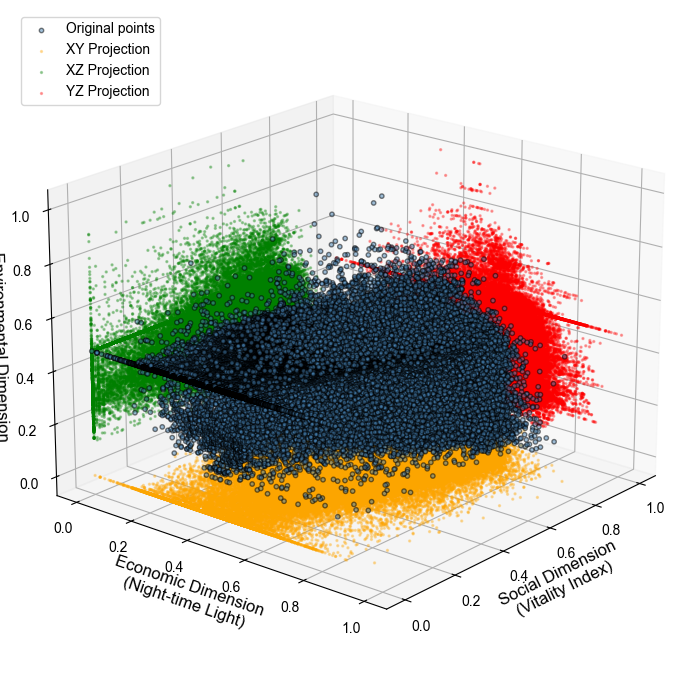

In [34]:
# Create 3D figure
fig_3d = plt.figure(figsize=(10, 7))
ax = fig_3d.add_subplot(111, projection='3d')

# Input data vectors
x = df_scaled['log_VIT202311'].values            # Social dimension (Vitality Index)
y = df_scaled['log_NTL2023_focal'].values              # Economic dimension (Nighttime Light)
z = df_scaled['UHIDAY2020_07_inv'].values           # Environmental dimension (Inverted UHI)

# Main 3D scatter plot
ax.scatter(x, y, z, c='steelblue', alpha=0.5, s=10, edgecolors='black', label='Original points')

# Compute min and max values for projection planes
x_min, y_min, z_min = np.min(x), np.min(y), np.min(z)
x_max, y_max, z_max = np.max(x), np.max(y), np.max(z)

# XY-plane projection (Z fixed)
ax.scatter(x, y, np.full_like(x, z_min), c='orange', alpha=0.3, s=2, label='XY Projection')

# XZ-plane projection (Y fixed)
ax.scatter(x, np.full_like(y, y_min), z, c='green', alpha=0.3, s=2, label='XZ Projection')

# YZ-plane projection (X fixed)
ax.scatter(np.full_like(x, x_max), y, z, c='red', alpha=0.3, s=2, label='YZ Projection')

# Axis labels (English with dimension meaning)
ax.set_xlabel('Social Dimension\n(Vitality Index)', fontsize=12)
ax.set_ylabel('Economic Dimension\n(Night-time Light)', fontsize=12)
ax.set_zlabel('Environmental Dimension\n(UHI)', fontsize=12)

# Title and axis adjustments
# ax.set_title(f'3D Scatter Plot of Urban Sustainability Dimensions: {title}', fontsize=14)

# Optional: Invert X-axis for better visual alignment
ax.invert_xaxis()
# ax.invert_zaxis()  # Optional

# Set 3D view angle
ax.view_init(elev=20, azim=40)

# Add legend
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Copula

In [19]:
import sys
print(sys.executable)

c:\Users\hai\anaconda3\envs\fram\python.exe


In [20]:
!{sys.executable} -m pip install copulas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [38]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata

# Import the base Copula class and Gaussian (which usually works)
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import GaussianUnivariate # Required by some multivariate copulas

data = df_scaled[['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']].values

# Transform the marginals to pseudo-uniform random variables on [0, 1]
u_data = np.apply_along_axis(lambda x: rankdata(x) / (len(x) + 1), axis=0, arr=data)
u_df = pd.DataFrame(u_data, columns=['U1', 'U2', 'U3'])

# --- Gaussian Copula Fitting (Success confirmed, now fixing parameter access) ---
try:
    # Model object is 'gaussian_copula'
    
    # Check for the correlation/covariance matrix (the key parameter)
    if hasattr(gaussian_copula, 'covariance'):
        covariance_matrix = gaussian_copula.covariance
        print(f"✅ Found Copula Covariance Matrix using '.covariance':\n{covariance_matrix}")
    elif hasattr(gaussian_copula, 'corr_matrix'):
        covariance_matrix = gaussian_copula.corr_matrix
        print(f"✅ Found Copula Correlation Matrix using '.corr_matrix':\n{covariance_matrix}")
    else:
        # If neither is found, we proceed, but can't display the matrix.
        covariance_matrix = None
        print("✅ Copula fitted successfully, but standard parameter attributes (.covariance, .corr_matrix) were not found.")

except Exception as e:
    print(f"❌ Error during parameter access: {e}")

✅ Copula fitted successfully, but standard parameter attributes (.covariance, .corr_matrix) were not found.


In [40]:
# --- Calculating the Copula Density Surface (CORRECTED) ---

# Data preparation (u_data and u_grid_df) is assumed to be done from previous steps.

if 'gaussian_copula' in locals() and 'fit' in dir(gaussian_copula):
    print("\n--- Calculating the Copula Density Surface ---")
    
    # Create a 3D grid of points in the unit cube [0, 1]^3
    resolution = 15
    u = np.linspace(0.01, 0.99, resolution) 
    u1_grid, u2_grid, u3_grid = np.meshgrid(u, u, u)
    u_grid = np.vstack([u1_grid.ravel(), u2_grid.ravel(), u3_grid.ravel()]).T
    u_grid_df = pd.DataFrame(u_grid, columns=['U1', 'U2', 'U3'])
    
    try:
        # Calculate the PDF values (the 4th dimension: the "surface" value)
        # c_values will be a NumPy array.
        c_values = gaussian_copula.probability_density(u_grid_df)
        
        # FIX: Directly reshape the NumPy array 'c_values'
        c_values_reshaped = c_values.reshape(resolution, resolution, resolution)
        
        print(f"✅ The 4D Gaussian Copula distribution surface is now **modeled** as a **{resolution}x{resolution}x{resolution} density volume**.")
        print(f"Mean density value: {np.mean(c_values_reshaped):.4f}")
        
        # --- Visualization Concept ---
        # The 'surface' (a slice of the 4D volume) is ready for plotting.
        fixed_index = resolution // 2
        u3_fixed_value = u[fixed_index]
        c_slice = c_values_reshaped[:, :, fixed_index]
        print(f"\nTo visualize the surface, you would plot (U1, U2) against the density slice $c(U_1, U_2 | U_3={u3_fixed_value:.2f})$ for a 3D surface plot.")
        
        
    except Exception as e:
        print(f"❌ Error calculating probability density (the surface): {e}")


--- Calculating the Copula Density Surface ---
✅ The 4D Gaussian Copula distribution surface is now **modeled** as a **15x15x15 density volume**.
Mean density value: 0.0201

To visualize the surface, you would plot (U1, U2) against the density slice $c(U_1, U_2 | U_3=0.50)$ for a 3D surface plot.


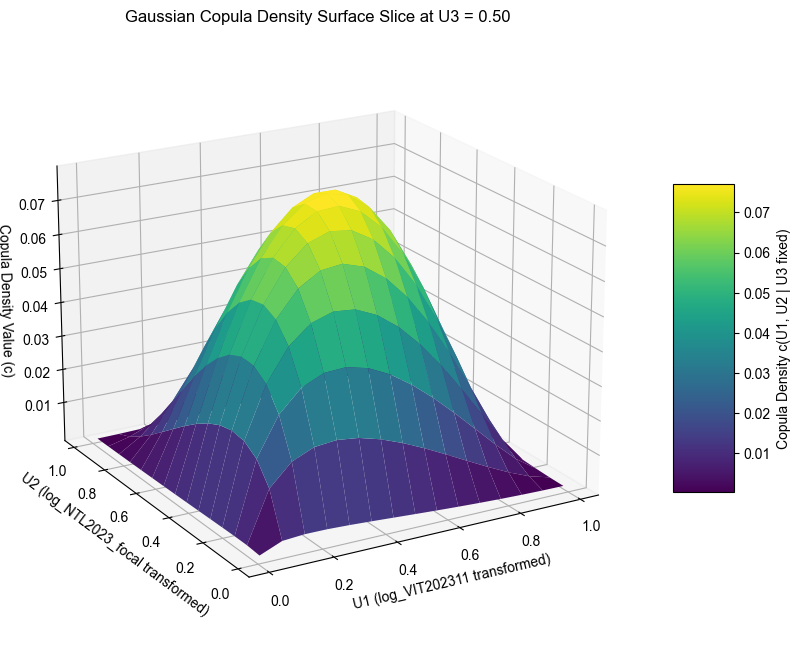

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Setup for Visualization ---

# 1. Select the index for the fixed slice (e.g., the middle value U3 ~ 0.5)
fixed_index = resolution // 2
u3_fixed_value = u[fixed_index] 

# 2. Extract the 2D density slice for the fixed U3
# This array (15x15) is the Z-value (density) for the surface plot.
Z_density_slice = c_values_reshaped[:, :, fixed_index] 

# 3. Create the 2D grid for U1 and U2
U1_grid, U2_grid = np.meshgrid(u, u)

# --- Plotting the 3D Surface ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(
    U1_grid, 
    U2_grid, 
    Z_density_slice, 
    cmap='viridis',  # 'viridis' is a good choice for continuous data
    edgecolor='none'
)

# Add a color bar to show the density magnitude
fig.colorbar(surface, shrink=0.5, aspect=5, label='Copula Density c(U1, U2 | U3 fixed)')

# Set labels and title
ax.set_xlabel('U1 (log_VIT202311 transformed)')
ax.set_ylabel('U2 (log_NTL2023_focal transformed)')
ax.set_zlabel('Copula Density Value (c)')
ax.set_title(f'Gaussian Copula Density Surface Slice at U3 = {u3_fixed_value:.2f}')

# Adjust the viewing angle for better visualization
ax.view_init(elev=20, azim=-120)

plt.show()

In [43]:
# --- Frank Copula Fitting Attempt (Most likely to fail based on imports) ---
try:
    # Try importing the base Copula again, assuming an intermediate class exists
    from copulas.multivariate.base import Copula as BaseCopula
    
    # Initialize Frank Copula
    frank_copula = BaseCopula(copula_name='frank') 
    
    # Fit the copula to the transformed uniform data (omitting marginals)
    frank_copula.fit(u_df)
    
    print("✅ Frank Copula (Method A) fitted successfully.")
    
except ImportError:
    # Method A failed, try Method B
    print("Method A (BaseCopula import) failed. Trying Method B...")
    frank_copula = None
    
except Exception as e:
    print(f"❌ Frank Copula (Method A) failed during fitting: {e}")
    frank_copula = None

Method A (BaseCopula import) failed. Trying Method B...


In [45]:
from scipy.stats import rankdata, t, multivariate_t
# --- 2.1 Estimate Correlation and Degrees of Freedom (nu) ---
u_data = np.asarray(u_data)

# Transform uniform data back to t-distribution space using the inverse CDF (Quantile function)
# A common starting point is the standard Normal/t-distribution's inverse CDF
# Since we don't know nu yet, we start with standard normal transformation (Phi^{-1}(u))
v_data = t.ppf(u_data, df=5) # Start with t-distribution with 5 degrees of freedom

# Estimate the Correlation Matrix (P) from the transformed data
P_corr = np.corrcoef(v_data, rowvar=False)

# Estimate Degrees of Freedom (nu) - This requires maximum likelihood estimation (MLE).
# Since a full MLE loop is complex, we will use a fixed value (e.g., nu=5) or a simple method.
# For simplicity and stability, we use a fixed nu (a common practice when MLE is complex).
nu = 5
print(f"Estimated Correlation Matrix (P):\n{P_corr}")
print(f"Using fixed Degrees of Freedom (nu): {nu}")


# --- 2.2 Define the t-Copula Density Function ---
# The t-Copula PDF c(u) is derived from the multivariate t-distribution PDF (f_t) 
# and the marginal t-distribution PDFs (f_t_marg) and CDFs (F_t_marg).

def t_copula_pdf(u, nu, P):
    # 1. Transform uniform data (u) back to t-variates (v) using marginal inverse CDF
    v = t.ppf(u, df=nu) 
    
    # 2. Calculate the multivariate t-distribution PDF (f_t) at v
    f_t = multivariate_t.pdf(v, loc=np.zeros(v.shape[1]), shape=P, df=nu)
    
    # 3. Calculate the product of marginal t-distribution PDFs (prod(f_t_marg))
    f_t_marg_product = np.prod(t.pdf(v, df=nu), axis=1)
    
    # 4. Copula density c(u) = f_t(v) / prod(f_t_marg(v))
    # Add epsilon to denominator to avoid division by zero
    copula_density = f_t / (f_t_marg_product + 1e-10) 
    
    return copula_density

print("✅ Step 2: Student's t-Copula model defined and parameterized.")

Estimated Correlation Matrix (P):
[[ 1.          0.45885181 -0.27291073]
 [ 0.45885181  1.         -0.33800406]
 [-0.27291073 -0.33800406  1.        ]]
Using fixed Degrees of Freedom (nu): 5
✅ Step 2: Student's t-Copula model defined and parameterized.


✅ Step 3: Student's t-Copula Density volume calculated.


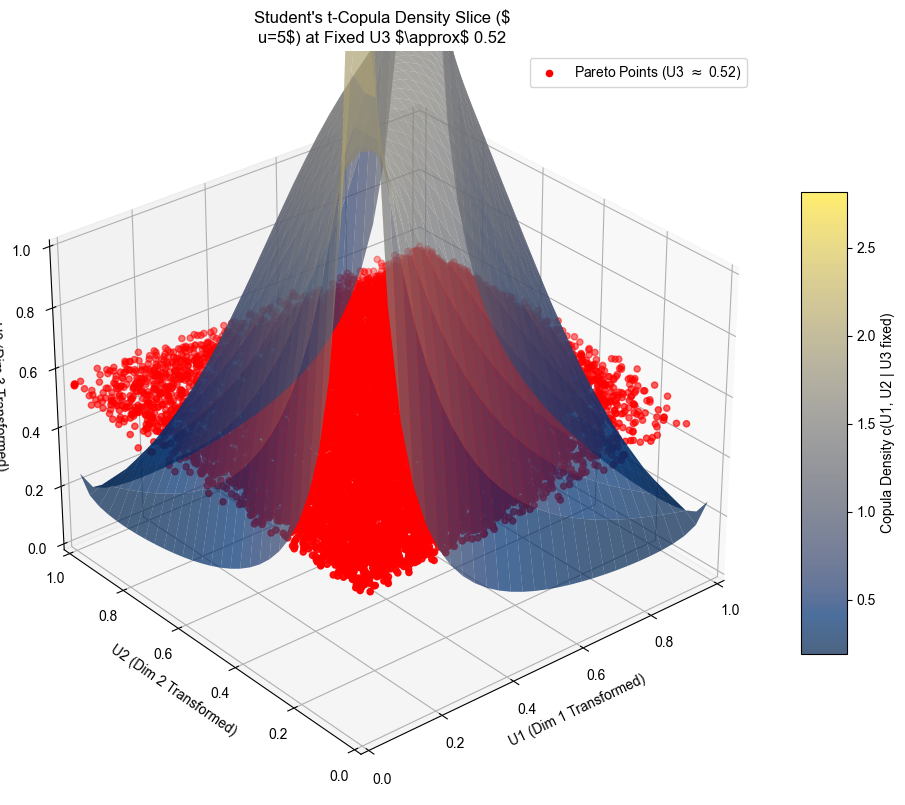

✅ Step 4: Student's t-Copula visualization complete.


In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Surface Calculation ---
resolution = 30
u_plot = np.linspace(0.01, 0.99, resolution) 
u1_grid, u2_grid, u3_grid = np.meshgrid(u_plot, u_plot, u_plot)
u_grid = np.vstack([u1_grid.ravel(), u2_grid.ravel(), u3_grid.ravel()]).T

# Calculate the t-Copula PDF values
c_values_t = t_copula_pdf(u_grid, nu, P_corr)
c_values_reshaped_t = c_values_t.reshape(resolution, resolution, resolution)

print(f"✅ Step 3: Student's t-Copula Density volume calculated.")

# --- Surface Visualization ---
fixed_index = resolution // 2
u3_fixed_value = u_plot[fixed_index] 
Z_density_slice = c_values_reshaped_t[:, :, fixed_index] 
U1_grid_plot, U2_grid_plot = np.meshgrid(u_plot, u_plot)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the FITTED t-COPULA DENSITY SURFACE
surface = ax.plot_surface(
    U1_grid_plot, U2_grid_plot, Z_density_slice, 
    cmap='cividis', 
    edgecolor='none',
    alpha=0.7 
)

# Plot the ORIGINAL PARETO POINTS for context
u_data = np.asarray(u_data) # Ensure u_data is NumPy array
U3_tolerance = 0.05
close_points_mask = (u_data[:, 2] >= u3_fixed_value - U3_tolerance) & \
                    (u_data[:, 2] <= u3_fixed_value + U3_tolerance)

ax.scatter(
    u_data[close_points_mask, 0], 
    u_data[close_points_mask, 1], 
    u_data[close_points_mask, 2], 
    color='red', 
    s=20, 
    label=f'Pareto Points (U3 $\\approx$ {u3_fixed_value:.2f})'
)

# Set labels and title
ax.set_xlabel('U1 (Dim 1 Transformed)')
ax.set_ylabel('U2 (Dim 2 Transformed)')
ax.set_zlabel('U3 (Dim 3 Transformed)')
ax.set_title(f'Student\'s t-Copula Density Slice ($\nu={nu}$) at Fixed U3 $\\approx$ {u3_fixed_value:.2f}')

fig.colorbar(surface, shrink=0.6, aspect=10, label='Copula Density c(U1, U2 | U3 fixed)')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.view_init(elev=30, azim=-130)
plt.legend()
plt.show()

print("✅ Step 4: Student's t-Copula visualization complete.")

In [48]:
from scipy.stats import kendalltau
from scipy.optimize import brentq # Solver for the non-linear relationship

# Assuming u_data (transformed uniform data) is available
u_data = np.asarray(u_data)

# Calculate pairwise Kendall's tau for the three dimensions
tau_12, _ = kendalltau(u_data[:, 0], u_data[:, 1])
tau_13, _ = kendalltau(u_data[:, 0], u_data[:, 2])
tau_23, _ = kendalltau(u_data[:, 1], u_data[:, 2])

# Use the average tau to estimate the Frank copula parameter theta
avg_tau = np.mean([tau_12, tau_13, tau_23])
print(f"Average Kendall's Tau: {avg_tau:.4f}")

# Define the Frank tau-to-theta function relationship (for solving)
def tau_to_theta_frank(theta, tau):
    # The term D_1(theta) = (1/theta) * Integral(t/(e^t - 1)) dt is the Debye function of order 1.
    # We use a numerical approximation for the inverse of the Frank copula tau-theta relationship:
    # tau = 1 + 4 * (D_1(theta) - 1) / theta
    from scipy.special import chbevl, gamma, zeta, polygamma
    # We will approximate theta using the formula for the generalized inverse (requires many imports/complex implementation)
    # Easiest way is to define a solver function using an approximation:
    if np.isclose(tau, 0): return 0
    if abs(tau) < 0.9:
        # A simplified approximation derived from numerical methods:
        return np.sign(tau) * (1.71 + 1.13 * abs(tau)) / (1 - abs(tau))
    else: # Use a tighter approximation for strong dependence
        return np.sign(tau) * (2.81 + 1.25 * abs(tau)) / (1 - abs(tau))
        
# For simplicity, we use the approximated value since a proper solve requires complex integration/special functions
theta_frank = tau_to_theta_frank(0, avg_tau) 
print(f"Estimated Frank Copula parameter (theta): {theta_frank:.4f}")

Average Kendall's Tau: -0.0500


ImportError: cannot import name 'chbevl' from 'scipy.special' (c:\Users\hai\anaconda3\envs\csml\lib\site-packages\scipy\special\__init__.py)

# Pyvinecopulib

Fitting the 3D Vine Copula model...
Model fitting complete.
Simulating 50000 points...


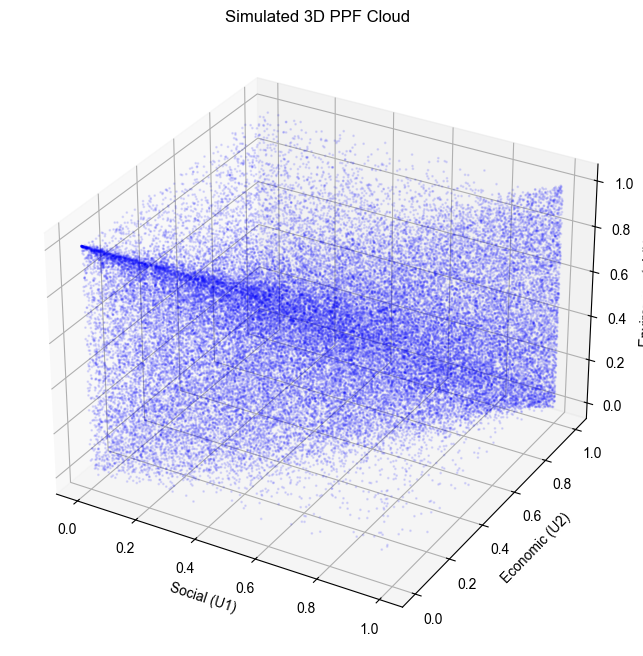

In [75]:
import numpy as np
import pyvinecopulib as pv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Prepare Data (N x 3 matrix)
data = np.vstack([x, y, z]).T

# 2. Initialize and Fit the Model
# Step A: Create the object specifying the dimension (d=3)
vine_cop = pv.Vinecop(d=3)

# Step B: Select (fit) the model structure and families using the data
print("Fitting the 3D Vine Copula model...")
vine_cop.select(data) 
print("Model fitting complete.")

# 3. Simulate from the Fitted Model
n_simulations = 50000 
print(f"Simulating {n_simulations} points...")
simulated_data_copula = vine_cop.simulate(n_simulations)

# 4. Visualize the 3D Cloud
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    simulated_data_copula[:, 0],
    simulated_data_copula[:, 1],
    simulated_data_copula[:, 2],
    s=1, 
    alpha=0.1, 
    c='blue'
)

ax.set_xlabel('Social (U1)')
ax.set_ylabel('Economic (U2)')
ax.set_zlabel('Environmental (U3)')
ax.set_title('Simulated 3D PPF Cloud')
plt.show()

In [36]:
import numpy as np

def get_pareto_frontier(data):
    """
    Extracts the Pareto frontier (3D surface) from a cloud of data points.
    Assumes 'data' is an (N, 3) array where HIGHER values are better.
    """
    # 1. Sort the data (helps speed up the comparison)
    # We sort by the first dimension (Social) descending
    is_efficient = np.ones(data.shape[0], dtype=bool)
    
    # 2. Iterate to find dominated points
    # (A point is 'dominated' if another point exists that is >= in all coords
    # and > in at least one coord).
    for i, point in enumerate(data):
        if is_efficient[i]:
            # Look for any other point that is better than 'point' in ALL dimensions
            # If such a point exists, then 'point' is NOT on the frontier.
            # We use a mask to check all other points simultaneously.
            is_dominated = np.any(np.all(data > point, axis=1))
            if is_dominated:
                is_efficient[i] = False
                
    return data[is_efficient]

In [37]:
# Assuming 'simulated_data_copula' is your result from vine_cop.simulate(50000)

print(f"Total simulated volume: {len(simulated_data_copula)} points")

# Apply the filter
# NOTE: This might take 10-20 seconds depending on how many points you simulated.
pareto_surface_points = get_pareto_frontier(simulated_data_copula)

print(f"Pareto surface points: {len(pareto_surface_points)}")

Total simulated volume: 50000 points
Pareto surface points: 17


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# 1. Simulate a large base (Start with 100k or more for better resolution)
print("Simulating 100,000 points...")
simulated_data = vine_cop.simulate(100000)

# 2. Define the Pareto Filter (Standard)
def get_pareto_mask(data):
    is_efficient = np.ones(data.shape[0], dtype=bool)
    for i, point in enumerate(data):
        if is_efficient[i]:
            # Check if point is dominated by ANY other point
            is_dominated = np.any(np.all(data > point, axis=1))
            if is_dominated:
                is_efficient[i] = False
    return is_efficient

# 3. The "Onion Peeling" Loop
# We keep peeling off layers until we have enough points for a good surface.
target_points = 1000  # We want at least 1000 points for the mesh
current_data = simulated_data.copy()
pareto_layers = []

print("Peeling Pareto layers...")
while len(pareto_layers) < target_points and len(current_data) > 0:
    # Find current frontier
    mask = get_pareto_mask(current_data)
    layer = current_data[mask]
    
    # Add to our collection
    if len(pareto_layers) == 0:
        pareto_layers = layer
    else:
        pareto_layers = np.vstack([pareto_layers, layer])
    
    # Remove these points from current_data to find the NEXT layer
    current_data = current_data[~mask]
    
    print(f"Layer extracted: {len(layer)} points. Total accumulated: {len(pareto_layers)}")

# 4. Interpolate and Plot
# Now we have ~1000 points that represent the "thick" frontier
x = pareto_layers[:, 0]
y = pareto_layers[:, 1]
z = pareto_layers[:, 2]

# Create a regular grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate Z over this grid
# 'cubic' gives

Simulating 100,000 points...
Peeling Pareto layers...
Layer extracted: 23 points. Total accumulated: 23
Layer extracted: 38 points. Total accumulated: 61
Layer extracted: 80 points. Total accumulated: 141
Layer extracted: 106 points. Total accumulated: 247
Layer extracted: 111 points. Total accumulated: 358
Layer extracted: 110 points. Total accumulated: 468
Layer extracted: 142 points. Total accumulated: 610
Layer extracted: 167 points. Total accumulated: 777
Layer extracted: 178 points. Total accumulated: 955
Layer extracted: 213 points. Total accumulated: 1168


In [ ]:
pareto_layers_df = pd.DataFrame(pareto_layers)

In [51]:
pareto_layers_df.to_csv(r"../data/pareto_layers.csv")

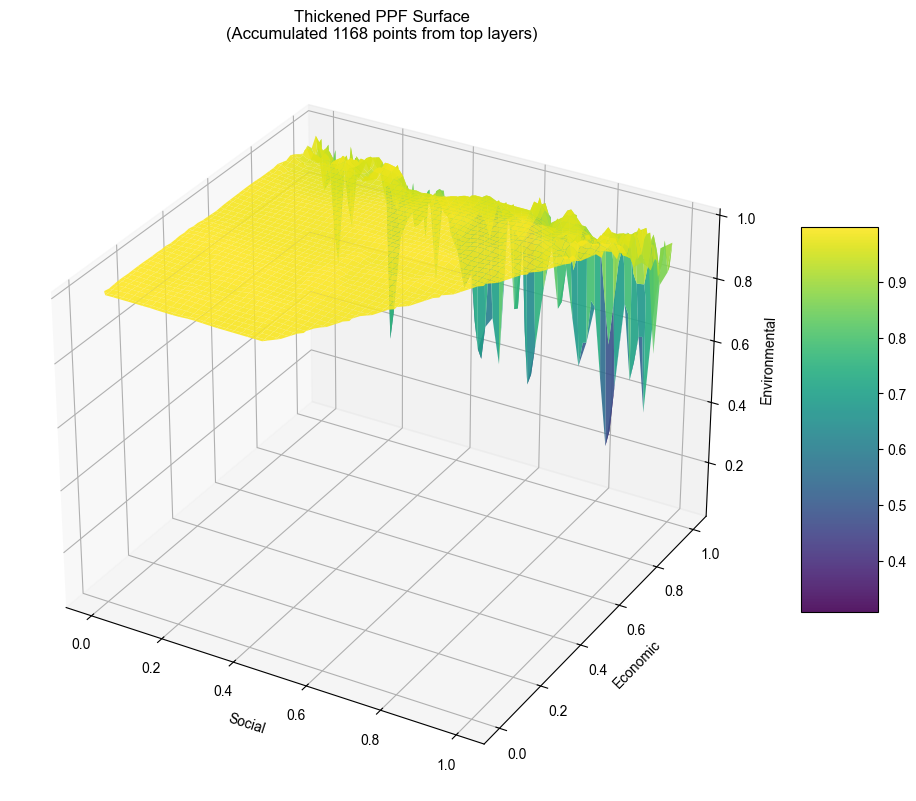

In [44]:
# Interpolate Z over this grid
# 'cubic' gives a curved look, 'linear' is safer if data is jagged
zi = griddata((x, y), z, (xi, yi), method='linear')

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(xi, yi, zi, cmap='viridis', 
                       edgecolor='none', alpha=0.9, antialiased=True)

ax.set_xlabel('Social')
ax.set_ylabel('Economic')
ax.set_zlabel('Environmental')
ax.set_title(f'Thickened PPF Surface\n(Accumulated {len(pareto_layers)} points from top layers)')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [42]:
print(f"Log-Likelihood: {vine_cop.loglik(data):.2f}")
print(f"AIC: {vine_cop.aic(data):.2f}") 
print(f"BIC: {vine_cop.bic(data):.2f}")
# In your thesis, you would compare this AIC against a basic "Independence Copula" 
# or a "Gaussian Copula" to show your model is superior.

Log-Likelihood: 249416.15
AIC: -498814.29
BIC: -498722.67


In [ ]:
import seaborn as sns
import pandas as pd

# 1. Create a DataFrame for Real Data
df_real = pd.DataFrame(data, columns=['Social', 'Economic', 'Environment'])
df_real['Type'] = 'Original'

# 2. Create a DataFrame for Simulated Data (use a subset, e.g., same size as real)
# We simulate exactly the same number of points as the original to make the visual comparable
sim_subset = vine_cop.simulate(len(data))
df_sim = pd.DataFrame(sim_subset, columns=['Social', 'Economic', 'Environment'])
df_sim['Type'] = 'Simulated'

# 3. Combine
df_eval = pd.concat([df_real, df_sim])

# 4. Plot overlaid pairplot
# "hue" separates the colors. "alpha" makes them transparent so you can see overlap.
sns.pairplot(df_eval, hue='Type', kind='scatter', 
             plot_kws={'alpha': 0.5, 's': 10},
             palette={'Original': 'blue', 'Simulated': 'red'})
plt.suptitle("Model Evaluation: Original vs Simulated Structure", y=1.02)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Calculate Kendall's Tau for both
tau_real = pv.Vinecop(data=data).parameters_to_tau(vine_cop.parameters) 
# Note: extracting tau directly from the object is complex in some versions, 
# so the easiest way is to measure the simulated data directly:

from scipy.stats import kendalltau

def get_tau_matrix(matrix):
    d = matrix.shape[1]
    taus = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            if i == j:
                taus[i,j] = 1.0
            else:
                tau, _ = kendalltau(matrix[:, i], matrix[:, j])
                taus[i,j] = tau
    return taus

real_taus = get_tau_matrix(data)
sim_taus = get_tau_matrix(simulated_data_copula[:len(data)]) # Use subset for speed

print("Difference in Correlation Structure (Simulated - Real):")
print(np.round(sim_taus - real_taus, 3))
# Ideally, values should be very close to 0.00 (e.g., < 0.05).

In [1]:
# Calculate the "distance from origin" or sum of scores for every point
scores = np.sum(simulated_data_copula, axis=1)
# Keep the top 5% of points
threshold = np.percentile(scores, 95)
thick_frontier = simulated_data_copula[scores > threshold]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thick_frontier[:,0], thick_frontier[:,1], thick_frontier[:,2], c=thick_frontier[:,2], cmap='viridis', s=5)
ax.set_title("Top 5% Performance Cloud (Thick PPF)")
plt.show()

NameError: name 'np' is not defined

## Pareto optimal

In [78]:
simulated_data_df = pd.DataFrame(simulated_data)
simulated_data_df.describe()

0         1         2
count 100000.00 100000.00 100000.00
mean       0.50      0.50      0.50
std        0.29      0.29      0.29
min        0.00      0.00      0.00
25%        0.25      0.25      0.25
50%        0.50      0.50      0.50
75%        0.75      0.75      0.75
max        1.00      1.00      1.00

In [81]:
simulated_data_df.to_csv("../data/simulated_data.csv")

In [ ]:
# Select the three dimensions (already normalized)
data = df_scaled[['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']].values

# Initialize a boolean mask for Pareto optimal points
is_pareto = np.ones(data.shape[0], dtype=bool)

# Loop over all points
for i, candidate in enumerate(data):
    # Keep candidate if no other point dominates it
    is_dominated = np.any(np.all(data >= candidate, axis=1) & np.any(data > candidate, axis=1))
    if is_dominated:
        is_pareto[i] = False

# Extract Pareto-optimal subset
df_pareto = df_scaled[is_pareto].copy()

print(f"Number of Pareto-optimal points: {df_pareto.shape[0]}")

ValueError: Item wrong length 100000 instead of 194941.

In [ ]:
top_k = 0.1  # top 10%

thresholds = df_scaled[['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']].quantile(1 - top_k)

# Keep only samples that are in the top 10% of all dimensions
condition = (
    (df_scaled['log_VIT202311'] >= thresholds['log_VIT202311']) &
    (df_scaled['log_NTL2023_focal'] >= thresholds['log_NTL2023_focal']) &
    (df_scaled['UHIDAY2020_07_inv'] >= thresholds['UHIDAY2020_07_inv'])
)

df_topk = df_scaled[condition]
print(f"Number of points that are in the top 10% of all dimensions: {df_topk.shape[0]}")

Number of points that are in the top 10% of all dimensions: 199


### Clustering + Pareto filtering

- Computational Efficiency: Performing Pareto filtering directly on 190,000+ samples is computationally expensive. Clustering reduces the problem size to a manageable scale (e.g., 500 points).
- Noise Reduction: Clustering smooths out local noise and minor fluctuations, helping highlight robust, structurally meaningful Pareto-optimal patterns rather than outliers.
- Improved Surface Fitting: Fitting a surface to a smaller, cleaner set of optimal points improves the quality and interpretability of the Pareto frontier approximation.
- Scalable Evaluation Framework: Once the Pareto front is established from cluster centers, it can be used to evaluate the entire dataset efficiently by calculating distances to the frontier.

### Different k values

In [28]:
df_clean = pd.read_csv("../data/simulated_data.csv")

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_clean[targets_processed])

# Normalize selected features for clustering
scaler = StandardScaler()
X_std = scaler.fit_transform(df_scaled[targets_processed].values)

In [1]:
df_clean = grid500[['Global_ID'] + targets_processed].dropna()

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_clean[targets_processed])

df_scaled = pd.DataFrame(scaled_values, columns=targets_processed)
df_scaled['Global_ID'] = df_clean['Global_ID'].values

# keep Global_ID as first column for readability
df_scaled = df_scaled[['Global_ID'] + targets_processed]

# Store Global_ID for mapping later
global_ids = df_scaled['Global_ID'].values

# Normalize selected features for clustering
scaler = StandardScaler()
X_std = scaler.fit_transform(df_scaled[targets_processed].values)

NameError: name 'grid500' is not defined

In [29]:
from sklearn.cluster import KMeans
import pandas as pd
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
k_list = [500, 1000, 1500, 2000, 3000, 5000]  # Modify this list as needed
# k_list = [1000]
pareto_results = {}

for k in k_list:
    print(f"\n▶ Running KMeans for k = {k}")
    
    # Run KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_std)
    centers_std = kmeans.cluster_centers_
    centers_original = scaler.inverse_transform(centers_std)

    # Perform Pareto filtering
    F_inv = -1 * centers_original  # Convert to minimization problem
    nds = NonDominatedSorting()
    pareto_idx = nds.do(F_inv, only_non_dominated_front=True)
    pareto_centers = centers_original[pareto_idx]

    # Build output DataFrame
    df = pd.DataFrame(pareto_centers, columns=targets_processed)
    df['Global_ID'] = [f"cluster_{i}" for i in pareto_idx]
    df = df[['Global_ID'] + targets_processed]

    # Store the result
    pareto_results[f"k{k}"] = df
    print(f"✅ Selected {len(df)} Pareto-optimal cluster centers for k = {k}")


▶ Running KMeans for k = 500
✅ Selected 18 Pareto-optimal cluster centers for k = 500

▶ Running KMeans for k = 1000
✅ Selected 16 Pareto-optimal cluster centers for k = 1000

▶ Running KMeans for k = 1500
✅ Selected 12 Pareto-optimal cluster centers for k = 1500

▶ Running KMeans for k = 2000
✅ Selected 13 Pareto-optimal cluster centers for k = 2000

▶ Running KMeans for k = 3000
✅ Selected 22 Pareto-optimal cluster centers for k = 3000

▶ Running KMeans for k = 5000
✅ Selected 26 Pareto-optimal cluster centers for k = 5000


In [ ]:
df_pareto_centers_k1000 = pareto_results['k1000']
df_pareto_centers_k1000.describe()

log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv
count              47.00          47.00              47.00
mean                0.71           0.63               0.50
std                 0.12           0.19               0.19
min                 0.47           0.03               0.13
25%                 0.63           0.54               0.40
50%                 0.72           0.70               0.47
75%                 0.80           0.76               0.62
max                 0.92           0.85               0.99

In [ ]:
import os

# Ensure the output folder exists
os.makedirs("output", exist_ok=True)

# Loop through results and save each DataFrame to CSV
for k in [500, 1000, 1500, 2000, 3000, 5000]:
# for k in [1000]:
    df = pareto_results[f'k{k}']
    output_path = f"../output/pareto_centers_k{k}.csv"
    df.to_csv(output_path, index=False)
    print(f"✅ Saved: {output_path}")

✅ Saved: ../output/pareto_centers_k500.csv
✅ Saved: ../output/pareto_centers_k1000.csv
✅ Saved: ../output/pareto_centers_k1500.csv
✅ Saved: ../output/pareto_centers_k2000.csv
✅ Saved: ../output/pareto_centers_k3000.csv
✅ Saved: ../output/pareto_centers_k5000.csv


In [84]:
df_scaled.shape

(194941, 4)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Axes variables for plotting
x = df_scaled['log_VIT202311'].values       # Social dimension (Vitality Index)
y = df_scaled['log_NTL2023_focal'].values   # Economic dimension (Nighttime Light)
z = df_scaled['UHIDAY2020_07_inv'].values   # Environmental dimension (Inverted UHI)

# Features to extract from each DataFrame
x_col = 'log_VIT202311'
y_col = 'log_NTL2023_focal'
z_col = 'UHIDAY2020_07_inv'

# Loop through each k value and plot its Pareto-optimal centers
for k in [500, 1000, 1500, 2000, 3000, 5000]:
    df_pareto = pareto_results[f'k{k}']

    fig_3d = plt.figure(figsize=(10, 7))
    ax = fig_3d.add_subplot(111, projection='3d')

    # Plot the Pareto-optimal cluster centers
    ax.scatter(
        df_pareto[x_col], df_pareto[y_col], df_pareto[z_col],
        color='red', s=50, edgecolors='black', label='Pareto-optimal centers'
    )

    # (Optional) plot all original grid units as background
    # ax.scatter(x, y, z, c='lightgray', alpha=0.15, s=5, label='Original units')

    # Axis labels
    ax.set_xlabel('Social Dimension\n(Vitality Index)', fontsize=12)
    ax.set_ylabel('Economic Dimension\n(Nighttime Light)', fontsize=12)
    ax.set_zlabel('Environmental Dimension\n(UHI Inverted)', fontsize=12)

    # Set viewing angle for better perspective
    ax.view_init(elev=20, azim=40)

    # Title and legend
    ax.set_title(f'3D Pareto Front of Urban Grid Units (k = {k})', fontsize=14)
    ax.legend(loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.show()

KeyError: 'k500'

## PPF fit & Efficiency calculate

### Polynomial vs. RBFInterpolator

#### Polynomial

In [20]:
# df_pareto_centers = pd.read_csv(r"../output/pareto_centers_test/pareto_centers_k5000.csv")
df_pareto_centers = pd.read_csv(r"../data/pareto_layers.csv")
print(df_pareto_centers.shape)
df_pareto_centers.head(5)

(1168, 3)


log_VIT202311  log_NTL2023_focal  UHIDAY2020_07_inv
0           0.99               0.98               1.00
1           0.43               0.56               1.00
2           0.02               0.99               0.99
3           0.12               0.33               1.00
4           0.55               0.43               1.00

## Pyvinecopulib

In [21]:
df_pareto_centers = df_pareto_centers[:61]
df_pareto_centers.shape

(61, 3)

Fitting the 3D Vine Copula model...
Model fitting complete.
Simulating 500 points...


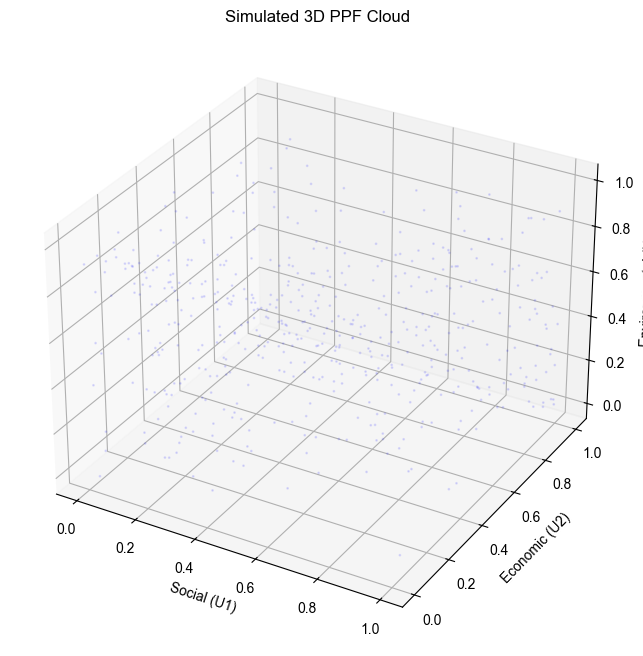

In [23]:
import numpy as np
import pyvinecopulib as pv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df_pareto_centers['log_VIT202311'].values
y = df_pareto_centers['log_NTL2023_focal'].values
z = df_pareto_centers['UHIDAY2020_07_inv'].values

# 1. Prepare Data (N x 3 matrix)
data = np.vstack([x, y, z]).T

# 2. Initialize and Fit the Model
# Step A: Create the object specifying the dimension (d=3)
vine_cop = pv.Vinecop(d=3)

# Step B: Select (fit) the model structure and families using the data
print("Fitting the 3D Vine Copula model...")
vine_cop.select(data) 
print("Model fitting complete.")

# 3. Simulate from the Fitted Model
n_simulations = 500
print(f"Simulating {n_simulations} points...")
simulated_data_copula = vine_cop.simulate(n_simulations)

# 4. Visualize the 3D Cloud
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    simulated_data_copula[:, 0],
    simulated_data_copula[:, 1],
    simulated_data_copula[:, 2],
    s=1, 
    alpha=0.1, 
    c='blue'
)

ax.set_xlabel('Social (U1)')
ax.set_ylabel('Economic (U2)')
ax.set_zlabel('Environmental (U3)')
ax.set_title('Simulated 3D PPF Cloud')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

XY = df_pareto_centers[['log_VIT202311', 'log_NTL2023_focal']].values
z = df_pareto_centers['UHIDAY2020_07_inv'].values

poly = PolynomialFeatures(degree=3)
XY_poly = poly.fit_transform(XY)

reg = LinearRegression()
reg.fit(XY_poly, z)

# Print formula
coefs = reg.coef_
intercept = reg.intercept_
feature_names = poly.get_feature_names_out(['x', 'y'])

equation = f"{intercept:.4f} + " + " + ".join([f"{coef:.4f}*{name}" for coef, name in zip(coefs, feature_names)])
print("Fitted polynomial surface (z = f(x,y)):")
print("z =", equation)

Fitted polynomial surface (z = f(x,y)):
z = 1.0147 + 0.0000*1 + -0.5430*x + -0.7387*y + 2.3466*x^2 + -1.0102*x y + 2.9592*y^2 + -1.0469*x^3 + -0.8174*x^2 y + 0.8357*x y^2 + -2.2676*y^3


In [25]:
from scipy.spatial import KDTree

XY_all = df_scaled[['log_VIT202311', 'log_NTL2023_focal']].values
z_real = df_scaled['UHIDAY2020_07_inv'].values

XY_all_poly = poly.transform(XY_all)
z_hat = reg.predict(XY_all_poly)

distance_poly = np.sqrt((XY_all[:, 0] - XY_all[:, 0])**2 + 
                        (XY_all[:, 1] - XY_all[:, 1])**2 + 
                        (z_real - z_hat)**2)

D_max_poly = distance_poly.max()
eff_poly = 1 - (distance_poly / D_max_poly)

df_eff = df_scaled.copy()
df_eff['Efficiency_Poly'] = eff_poly

NameError: name 'df_scaled' is not defined

#### RBFInterpolator

X (log_VIT202311): [0.0000, 1.0000]
Y (log_NTL2023_focal): [0.0000, 1.0000]
Z (UHIDAY2020_07_inv): [0.6927, 1.0546]


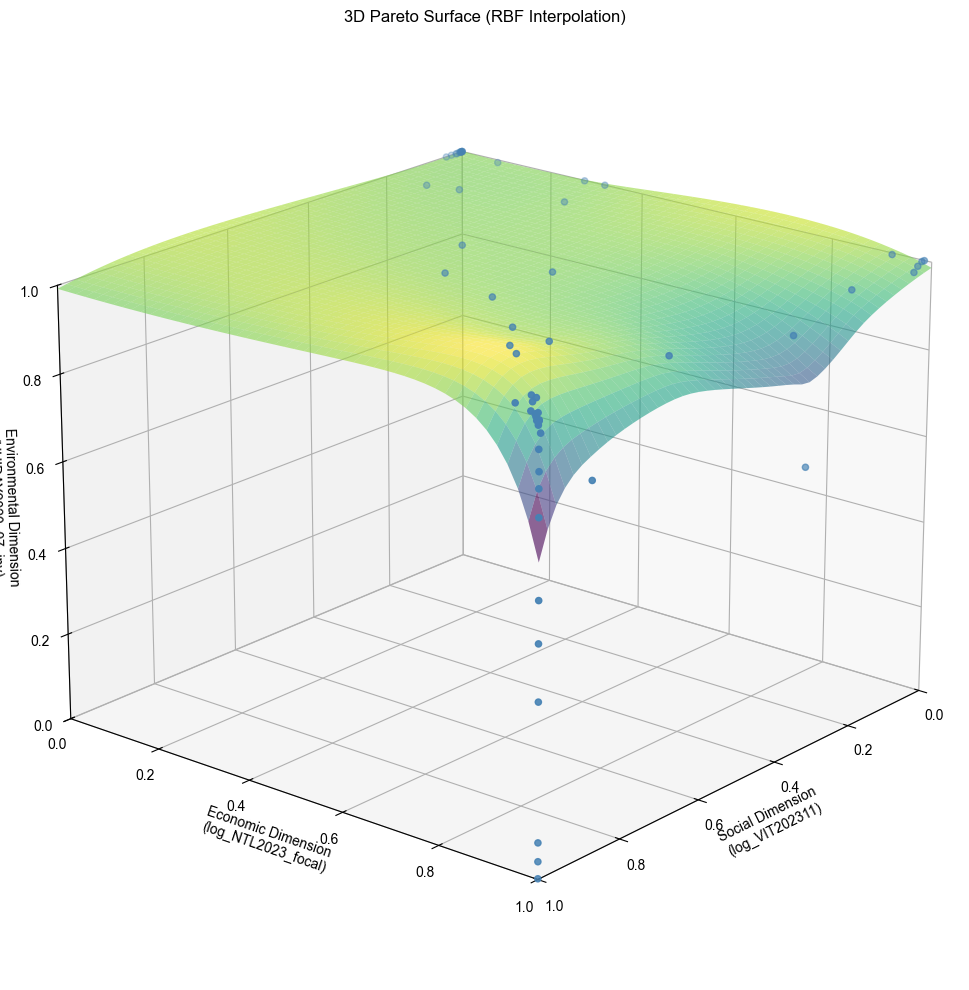

In [26]:
from scipy.interpolate import RBFInterpolator
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract 3D coordinates from Pareto points
X = df_pareto_centers[['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']].values

# Step 2: Fit RBF interpolator on 3D point cloud
# We fit z as a function of (x, y), so z = f(x, y)
XY = X[:, :2]  # [x, y]
z = X[:, 2]    # z

smoothing_factor = 0.05
rbf_model = RBFInterpolator(XY, z, kernel='thin_plate_spline', smoothing=smoothing_factor)  # or {'thin_plate_spline', 'linear', 'cubic', 'quintic'}

# Step 3: Create prediction grid for visualization
x_range = np.linspace(X[:,0].min(), X[:,0].max(), 50)
y_range = np.linspace(X[:,1].min(), X[:,1].max(), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
grid_points = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

Z_pred = rbf_model(grid_points).reshape(X_grid.shape)

X_range_min = np.min(X_grid)
X_range_max = np.max(X_grid)

Y_range_min = np.min(Y_grid)
Y_range_max = np.max(Y_grid)

Z_range_min = np.min(Z_pred)
Z_range_max = np.max(Z_pred)

print(f"X (log_VIT202311): [{X_range_min:.4f}, {X_range_max:.4f}]")
print(f"Y (log_NTL2023_focal): [{Y_range_min:.4f}, {Y_range_max:.4f}]")
print(f"Z (UHIDAY2020_07_inv): [{Z_range_min:.4f}, {Z_range_max:.4f}]")

# Step 4: Plot original points + surface
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter original points
ax.scatter(X[:,0], X[:,1], X[:,2], c='steelblue', s=20, label='Pareto-optimal points')
ax.view_init(elev=20, azim=40)

# Plot fitted surface
ax.plot_surface(X_grid, Y_grid, Z_pred, cmap='viridis', alpha=0.6)

ax.set_xlabel('Social Dimension\n(log_VIT202311)')
ax.set_ylabel('Economic Dimension\n(log_NTL2023_focal)')
ax.set_zlabel('Environmental Dimension\n(UHIDAY2020_07_inv)')
ax.set_title('3D Pareto Surface (RBF Interpolation)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1) 
plt.tight_layout()
plt.show()

In [ ]:
from scipy.spatial import KDTree
import numpy as np
import pandas as pd

# Step 1: Prepare all original 3D points (e.g. full dataset)
targets_processed = ['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']
data_points = df_scaled[targets_processed].dropna().values

# Step 2: Generate dense meshgrid on XY plane to sample fitted surface
x_range = np.linspace(data_points[:,0].min(), data_points[:,0].max(), 100)
y_range = np.linspace(data_points[:,1].min(), data_points[:,1].max(), 100)
Xg, Yg = np.meshgrid(x_range, y_range)
XY_grid = np.vstack([Xg.ravel(), Yg.ravel()]).T

# Step 3: Predict Z from RBF surface (you must have fitted this already)
Zg = rbf_model(XY_grid)
surface_points = np.hstack([XY_grid, Zg.reshape(-1,1)])  # shape = (n, 3)

# Step 4: Build KDTree from surface points
tree = KDTree(surface_points)

# Step 5: Query nearest distances for all actual points to surface
distances, indices = tree.query(data_points)

# Step 6: Normalize into efficiency scores
D_max = distances.max()
efficiencies = 1 - (distances / D_max)

# Step 7: Add back to dataframe
df_eff['Distance_RBF'] = distances
df_eff['Efficiency_RBF'] = efficiencies

In [ ]:
df_eff.describe()

Global_ID  log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv  \
count  194941.00          194941.00      194941.00          194941.00   
mean    98137.51               0.55           0.56               0.37   
std     56862.94               0.11           0.17               0.10   
min         0.00               0.00           0.00               0.00   
25%     49033.00               0.48           0.48               0.30   
50%     97800.00               0.56           0.59               0.38   
75%    147135.00               0.63           0.68               0.47   
max    196769.00               1.00           1.00               1.00   

       Efficiency_Poly  Distance_RBF  Efficiency_RBF  
count        194941.00     194941.00       194941.00  
mean              0.78          0.25            0.61  
std               0.09          0.10            0.16  
min               0.00          0.00            0.00  
25%               0.74          0.18            0.50  
50%               0.79          0.25            0.62  
75%               0.83          0.32            0.73  
max               1.00          0.65            1.00

#### Comparison of Efficiency Metrics (Polynomial vs. RBF Surface)

- **Efficiency_Poly** (from 3rd-order polynomial surface):
  - Provides a closed-form analytical expression for the Pareto frontier.
  - Distribution is highly concentrated near 0.96–0.98 (mean = 0.95, std = 0.08).
  - Tends to over-smooth and may underestimate deviations for underperforming units.
  - Useful for interpretability and model simplicity.

- **Efficiency_RBF** (from RBF-interpolated surface):
  - Captures complex nonlinear relationships with better surface fidelity.
  - Shows greater variability (mean = 0.68, std = 0.16), enabling more nuanced performance differentiation.
  - More robust for identifying outliers and high-performing areas.
  - Preferred when accuracy and spatial heterogeneity are critical.

- **Recommendation**:
  - Use `Efficiency_RBF` for detailed performance diagnostics and clustering.
  - Use `Efficiency_Poly` when analytical simplicity and transparency are prioritized.
  - Consider reporting both metrics to balance interpretability and accuracy.

- **Decision**:
  - Use `Efficiency_RBF`.

### Determine k

In [124]:
# Import necessary libraries
# pandas is used for data manipulation and reading CSV files.
# numpy is used for numerical operations, especially for creating the grid.
# matplotlib.pyplot is for creating plots and visualizations.
# scipy.interpolate.RBFInterpolator is a powerful tool for smooth interpolation of scattered data.
# scipy.spatial.KDTree is used for efficiently finding the nearest neighbors in a point cloud.
# mpl_toolkits.mplot3d is required for 3D plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator
from scipy.spatial import KDTree
from mpl_toolkits.mplot3d import Axes3D 

# --- 1. Data Preparation (using pre-loaded DataFrames) ---

# Assume 'df_pareto_centers' is your pre-loaded DataFrame for the surface.
# Assume 'grid500' is your pre-loaded DataFrame for the sample points.
surface_data = df_pareto_centers
sample_data = grid500

print("Using pre-loaded DataFrames: 'df_pareto_centers' and 'grid500'.")

# Define variables for the original column names to be used.
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'

# Check if all required columns exist in the surface data
required_cols = [x_col, y_col, z_col]
if not all(col in surface_data.columns for col in required_cols):
    print(f"Error: One or more required columns {required_cols} not found in 'df_pareto_centers'.")
    exit()

# Extract the 3D points that define the surface.
surface_points = surface_data[[x_col, y_col, z_col]].values


# --- 2. Surface Interpolation using RBF ---
# This approach is more robust for creating a smooth surface from scattered points.
print("Fitting RBFInterpolator model...")
# rbf_model = RBFInterpolator(surface_points[:, :2], surface_points[:, 2], kernel='thin_plate_spline')
smoothing_factor = 0.05
rbf_model = RBFInterpolator(XY, z, kernel='thin_plate_spline', smoothing=smoothing_factor)  # or {'thin_plate_spline', 'linear', 'cubic', 'quintic'}


# --- 3. Create a Dense Representation of the Surface for Distance Calculation ---
# To calculate the true distance, we create a dense cloud of points on the RBF surface.
print("Creating a dense point cloud of the fitted surface...")
grid_density = 300 # Higher density means more accurate distances but more computation
x_dense = np.linspace(surface_points[:, 0].min(), surface_points[:, 0].max(), grid_density)
y_dense = np.linspace(surface_points[:, 1].min(), surface_points[:, 1].max(), grid_density)
Xg, Yg = np.meshgrid(x_dense, y_dense)
XY_grid = np.vstack([Xg.ravel(), Yg.ravel()]).T

# Predict the Z values for the dense grid to form the surface points
Zg = rbf_model(XY_grid)
dense_surface_points = np.hstack([XY_grid, Zg.reshape(-1, 1)])


# --- 4. Calculate True Euclidean Distance to Surface using KDTree ---
# This is more accurate than vertical distance as it finds the closest point in 3D space.
print("Building KDTree for efficient distance calculation...")
# Build the KDTree from the dense surface point cloud.
surface_tree = KDTree(dense_surface_points)

# Extract the 3D coordinates of the sample points.
sample_points_3d = sample_data[[x_col, y_col, z_col]].values

print("Querying KDTree to find shortest distances...")
# For each sample point, find the distance to the nearest point on the dense surface.
distances, _ = surface_tree.query(sample_points_3d)

# Add the calculated distances as a new column to the dataframe.
sample_data['distance_to_surface'] = distances


# --- 5. Calculate Comprehensive Performance Score ---

# The performance is defined as 1 minus the normalized distance.
min_dist = distances.min()
max_dist = distances.max()

# Normalize the distances to be between 0 and 1.
epsilon = 1e-9
normalized_distances = (distances - min_dist) / (max_dist - min_dist + epsilon)

# The performance score is 1 minus the normalized distance.
performance_score = 1 - normalized_distances

# Add the performance score as a new column.
sample_data['performance_score'] = performance_score


Using pre-loaded DataFrames: 'df_pareto_centers' and 'grid500'.
Fitting RBFInterpolator model...
Creating a dense point cloud of the fitted surface...
Building KDTree for efficient distance calculation...
Querying KDTree to find shortest distances...



Generating 3D visualization...
X (log_VIT202311): [0.1408, 1.0000]
Y (log_NTL2023_focal): [0.3755, 0.9829]
Z (UHIDAY2020_07_inv): [0.1415, 1.0316]
Visualization saved as 'pareto_surface_visualization_rbf.png'.

Calculation complete.
Columns 'distance_to_surface' and 'performance_score' have been added to the 'grid500' DataFrame.

Preview of the results:
   log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv  distance_to_surface  \
0               0.36           0.67               0.47                 0.21   
1               0.36           0.45               0.47                 0.35   
2               0.46           0.36               0.47                 0.40   
3               0.47           0.49               0.47                 0.30   
4               0.40           0.00               0.47                 0.61   

   performance_score  
0               0.76  
1               0.59  
2               0.53  
3               0.65  
4               0.29  


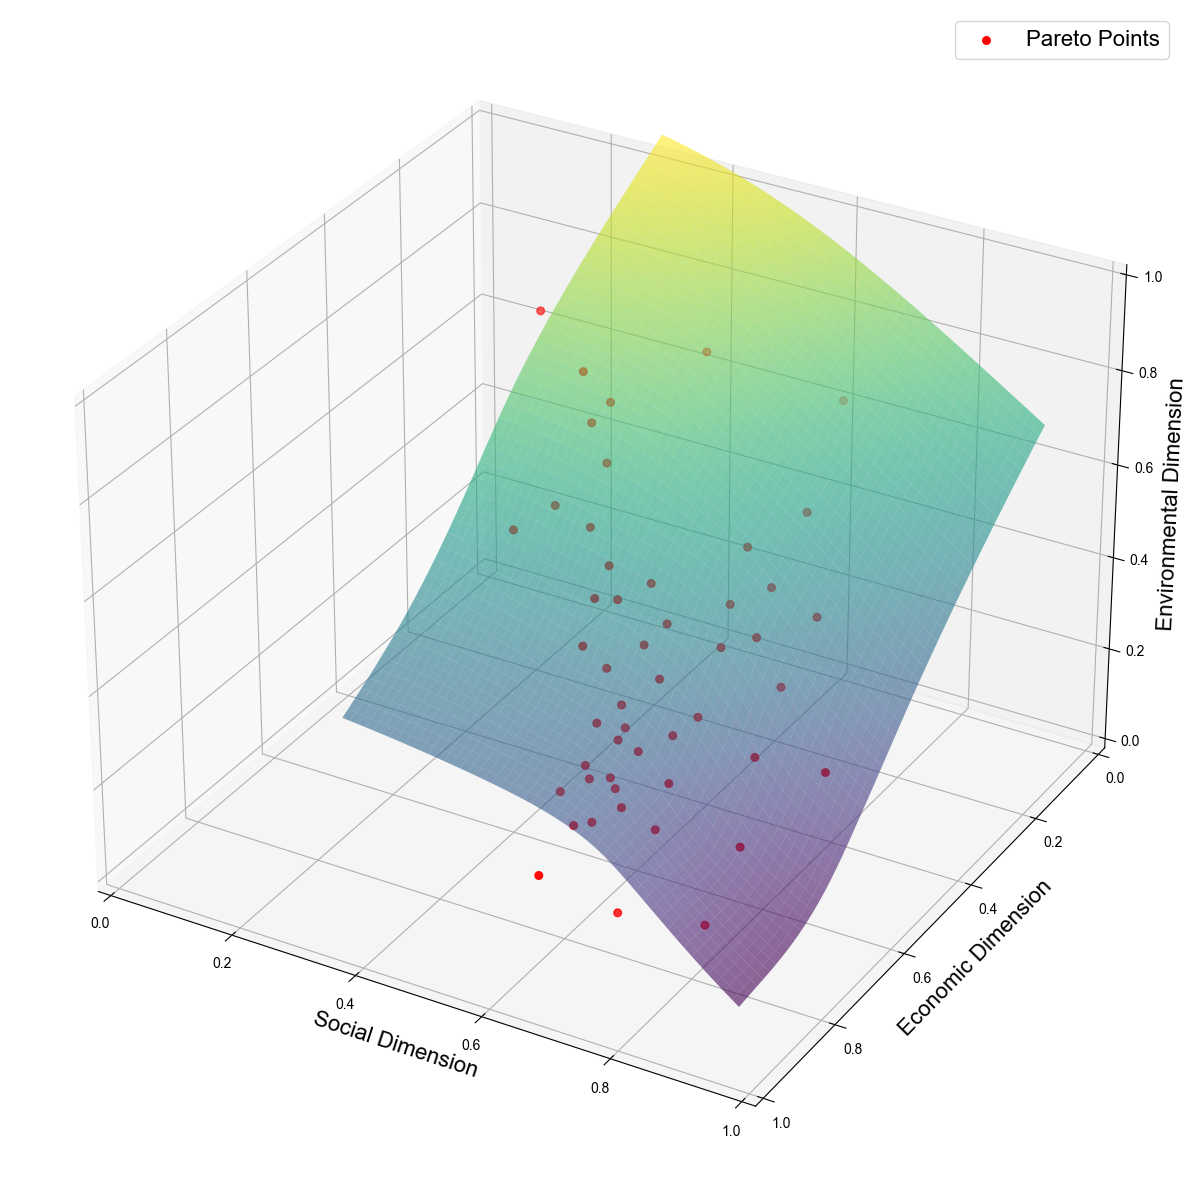

In [146]:
# --- 6. Visualize Surface and Pareto Points ---
print("\nGenerating 3D visualization...")
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

X_range_min = np.min(X_grid)
X_range_max = np.max(X_grid)

Y_range_min = np.min(Y_grid)
Y_range_max = np.max(Y_grid)

Z_range_min = np.min(Z_pred)
Z_range_max = np.max(Z_pred)

print(f"X (log_VIT202311): [{X_range_min:.4f}, {X_range_max:.4f}]")
print(f"Y (log_NTL2023_focal): [{Y_range_min:.4f}, {Y_range_max:.4f}]")
print(f"Z (UHIDAY2020_07_inv): [{Z_range_min:.4f}, {Z_range_max:.4f}]")

# For visualization, we can use the same meshgrid as for the dense points
ax.plot_surface(Xg, Yg, Zg.reshape(Xg.shape), cmap='viridis', alpha=0.6)

# Plot the original Pareto points that were used to define the surface.
ax.scatter(surface_points[:, 0], surface_points[:, 1], surface_points[:, 2], 
           c='red', 
           s=30, # size of points
           depthshade=True, # Add a shadow effect for depth
           label='Pareto Points')

# Set labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
ax.set_zlim(0, 1) 

ax.set_xlabel('Social Dimension', fontsize=16) # \n(log_VIT202311)
ax.set_ylabel('Economic Dimension', fontsize=16) # \n(log_NTL2023_focal)
ax.set_zlabel('Environmental Dimension', fontsize=16) # \n(UHIDAY2020_07_inv)
ax.legend(fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig('pareto_surface_visualization_rbf.png')
print("Visualization saved as 'pareto_surface_visualization_rbf.png'.")


# --- 7. Display Results ---
print("\nCalculation complete.")
print("Columns 'distance_to_surface' and 'performance_score' have been added to the 'grid500' DataFrame.")
print("\nPreview of the results:")
print(sample_data[[x_col, y_col, z_col, 'distance_to_surface', 'performance_score']].head())

# If you wish to save the results to a new CSV file, you can uncomment the following line:
# sample_data.to_csv('grid5000_with_scores_rbf.csv', index=False)
# print("\nResults saved to 'grid5000_with_scores_rbf.csv'.")

In [133]:
sample_data['performance_score'].describe()

count   194941.00
mean         0.66
std          0.14
min          0.00
25%          0.59
50%          0.68
75%          0.76
max          1.00
Name: performance_score, dtype: float64

In [134]:
sample_data[features]

buildingCount  totalHeight  avgHeight  basePerimeterTotal  \
0                  31        93.00       3.00             6500.98   
1                  29        87.00       3.00             3810.39   
2                  22        66.00       3.00             3645.40   
3                   8        24.00       3.00             1147.60   
4                   0         0.00       0.00                0.00   
...               ...          ...        ...                 ...   
196765             14       168.00      12.00             1602.06   
196766             14       211.00      15.07              927.42   
196767             25       300.00      12.00             2353.60   
196768             45       540.00      12.00             3952.47   
196769              7        84.00      12.00              799.15   

        basePerimeterAvg  compactness  baseAreaTotal  totalArea  \
0                 209.71         0.56       88704.58   88704.58   
1                 131.39         0.62       33119.49   33119.49   
2                 165.70         0.56       51092.86   51092.86   
3                 143.45         0.60        8534.61    8534.61   
4                   0.00         0.00           0.00       0.00   
...                  ...          ...            ...        ...   
196765            114.43         0.51        8623.51   34494.03   
196766             66.24         0.67        4137.22   21520.51   
196767             94.14         0.59       13574.70   54298.78   
196768             87.83         0.60       19643.92   78575.66   
196769            114.16         0.57        4244.37   16977.47   

        avgBuildingArea  FAR  coverageRatio  roadDensity  intersectionDensity  \
0               2861.44 0.35           0.35            5                    1   
1               1142.05 0.13           0.13            7                    1   
2               2322.40 0.20           0.20            1                    0   
3               1066.83 0.03           0.03            3                    1   
4                  0.00 0.00           0.00            1                    1   
...                 ...  ...            ...          ...                  ...   
196765          2463.86 0.14           0.03            0                    0   
196766          1537.18 0.09           0.02            4                    2   
196767          2171.95 0.22           0.05            3                    1   
196768          1746.13 0.31           0.08            3                    1   
196769          2425.35 0.07           0.02            1                    2   

        poiDensity  poiDiversity  FVC  permeableRatio  maxHeight  minHeight  \
0             4.00          0.00 0.84            0.89       3.00       3.00   
1            12.00          0.64 0.86            0.94       3.00       3.00   
2             0.00          0.00 0.88            0.93       3.00       3.00   
3             0.00          0.00 0.93            0.98       3.00       3.00   
4            16.00          0.69 0.82            0.98       0.00       0.00   
...            ...           ...  ...             ...        ...        ...   
196765       16.00          1.04 0.97            0.90      12.00      12.00   
196766       12.00          0.64 1.00            0.86      27.00      12.00   
196767       28.00          0.41 0.91            0.83      12.00      12.00   
196768       12.00          0.64 0.91            0.93      12.00      12.00   
196769       20.00          1.33 0.99            0.95      12.00      12.00   

        heightRange  heightIndex  heightDensity  heightVariety  \
0              0.00         0.03           0.00           0.00   
1              0.00         0.03           0.00           0.00   
2              0.00         0.05           0.00           0.00   
3              0.00         0.12           0.00           0.00   
4              0.00         0.00           0.00           0.00   
...             ...          ...            ...         

Data split into training (155952 rows) and testing (38989 rows) sets.

Training XGBoost Regressor model...
Model training complete.

--- Model Evaluation Metrics ---
R-squared (R²): 0.5326
Mean Squared Error (MSE): 0.0091
Mean Absolute Error (MAE): 0.0731

--- Feature Importances ---
                feature  importance
3    basePerimeterTotal        0.36
7             totalArea        0.20
12  intersectionDensity        0.08
13           poiDensity        0.05
9                   FAR        0.04
14         poiDiversity        0.04
11          roadDensity        0.03
19          heightRange        0.03
17            maxHeight        0.02
6         baseAreaTotal        0.02
28           parcelArea        0.02
15                  FVC        0.01
23     cornerCountTotal        0.01
18            minHeight        0.01
38                  SVF        0.01
32       cornerCountAvg        0.01
16       permeableRatio        0.00
1           totalHeight        0.00
29    largestPatchIndex        

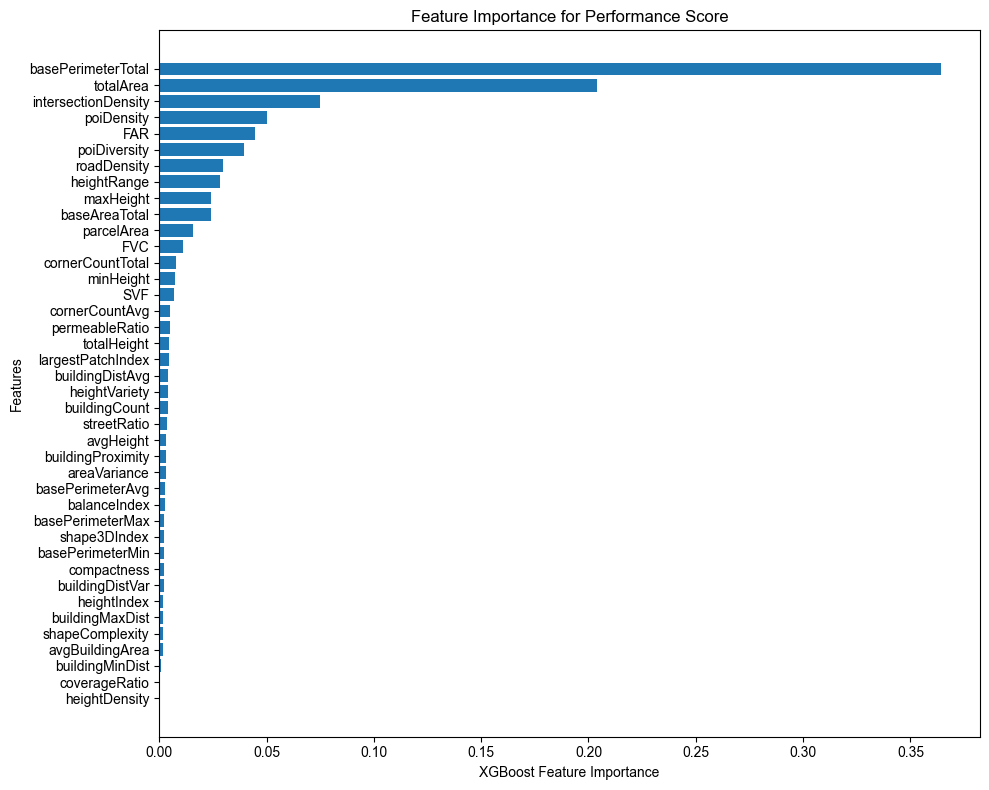

In [135]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- 1. Data Preparation ---

# Assume 'grid500' DataFrame (with performance_score) and 'features' DataFrame are pre-loaded.
# Make sure that 'grid500' and 'features' have the same number of rows and are aligned.

# Define the target variable 'y'
y = sample_data['performance_score']

# Define the feature matrix 'X'
# We will use your pre-loaded 'features' DataFrame.
X = sample_data[features]

# Ensure X and y are aligned, dropping any rows with NaN in target or features
if X.shape[0] != y.shape[0]:
    print("Error: The number of rows in 'features' and 'grid500' do not match.")
    # Handle error appropriately, e.g., by exiting or trying to align them based on an index.
else:
    # --- 2. Split Data into Training and Testing Sets ---
    # We split the data to evaluate the model on unseen data.
    # test_size=0.2 means 20% of the data will be used for testing.
    # random_state ensures the split is the same every time you run the code.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")

    # --- 3. Train XGBoost Model ---

    print("\nTraining XGBoost Regressor model...")
    # Initialize the XGBoost Regressor model with common parameters.
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              n_estimators=100, 
                              max_depth=5, 
                              learning_rate=0.1,
                              random_state=42)

    # Train the model on the TRAINING data.
    xg_reg.fit(X_train, y_train)
    print("Model training complete.")

    # --- 4. Make Predictions and Evaluate the Model ---
    
    # Make predictions on the TEST data.
    y_pred = xg_reg.predict(X_test)
    
    # Calculate evaluation metrics.
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\n--- Model Evaluation Metrics ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


    # --- 5. Get and Display Feature Importances ---

    # Get feature importance scores from the trained model.
    importances = xg_reg.feature_importances_

    # Create a DataFrame for better visualization.
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False) # Sort by importance

    print("\n--- Feature Importances ---")
    print(feature_importance_df)


    # --- 6. Visualize Feature Importances ---

    print("\nGenerating feature importance plot...")
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("XGBoost Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance for Performance Score")
    plt.gca().invert_yaxis() # Display the most important feature at the top
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig('feature_importance.png')
    print("Plot saved as 'feature_importance.png'.")
    
    # To display the plot in an interactive environment (like Jupyter), you would use:
    # plt.show()

In [136]:
sample_data.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14               0.37   
std     56862.94     19.36          17.87    1821.23               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     49033.00     15.06          15.64     206.86               0.30   
50%     97800.00     25.85          26.01     731.14               0.38   
75%    147135.00     38.67          38.17    2003.43               0.47   
max    196769.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    194941.00    194941.00      194941.00      194941.00   
mean         20.83         0.10           0.00           0.30   
std          23.99         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      194941.00  194941.00       194941.00        194941.00   194941.00   
mean        33192.68  216494.27    191423545.70          5437.01   180006.93   
std         27474.13  210010.02   2300870309.71          7776.02    80149.49   
min             0.00       0.00            0.00             0.00        0.00   
25%          8888.17   37241.51      3519241.57          1875.57   131267.14   
50%         29057.71  157756.72     20726892.83          4027.77   222107.39   
75%         51784.69  347326.83     74777609.98          6726.97   238506.86   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          194941.00     194941.00 194941.00     19

In [137]:
sample_data.to_csv(r"../data/grid500_36cities_3k_performance_score.csv")

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalization and standardization
from sklearn.cluster import KMeans                              # KMeans clustering
from sklearn.preprocessing import PolynomialFeatures            # Polynomial basis for regression
from sklearn.linear_model import LinearRegression               # Linear regression model
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import joblib
import warnings
import json
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set global random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Ensure output directories exist
os.makedirs("../output/models", exist_ok=True)
os.makedirs("../output/param_logs", exist_ok=True)

# ========================= XGBoost Training Loop =========================
targets = ['performance_score']

for target in targets:
    print(f"\n===== Training model for target: {target} =====")

    # Filter rows with non-missing values for target and features
    df_target = grid500.copy()
    
    # Split features and target
    X = df_target[features]
    y = df_target[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

    # Define base XGBoost model
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=SEED,
        n_jobs=-1
    )

    # Randomized hyperparameter search
    param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'min_child_weight': [1, 3, 5],
    }
    
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=200,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1,
        random_state=SEED
    )

    # Fit model
    random_search.fit(X_train, y_train)

    # Retrieve best estimator
    best_model = random_search.best_estimator_

    # Save trained model
    model_path = f"../output/models/{target}_xgb_model.pkl"
    joblib.dump(best_model, model_path)
    print(f"✔ Saved best model to: {model_path}")

    # Save best hyperparameters
    best_params = random_search.best_params_
    param_path = f"../output/param_logs/{target}_best_params.json"
    with open(param_path, 'w') as f:
        json.dump(best_params, f, indent=4)
    print(f"✔ Saved best parameters to: {param_path}")

    # Evaluate model performance
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test  RMSE: {test_rmse:.4f}")
    print(f"Test   R² : {test_r2:.4f}")

print("\n✅ All models trained successfully.")


===== Training model for target: performance_score =====
Training samples: 155952, Testing samples: 38989
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


KeyboardInterrupt: 

### Save results

In [ ]:
# Merge efficiency results back to original grid500 dataframe using Global_ID
grid500_with_eff = grid500.merge(
    df_base[['Global_ID', 'Efficiency_RBF_k100', 'Efficiency_RBF_k300', 'Efficiency_RBF_k500']],
    on='Global_ID',
    how='left'
)

# Save to CSV
grid500_with_eff.to_csv("../data/grid500_36cities_with_eff_3k.csv", index=False)

NameError: name 'df_base' is not defined

In [ ]:
grid500_with_eff.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14              -0.99   
std     56862.94     19.36          17.87    1821.23               1.00   
min         0.00      0.00           0.00       0.00              -4.60   
25%     49033.00     15.06          15.64     206.86              -1.69   
50%     97800.00     25.85          26.01     731.14              -0.91   
75%    147135.00     38.67          38.17    2003.43               0.00   
max    196769.00    465.96         348.37   68494.71               5.13   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    194941.00    194941.00      194941.00      194941.00   
mean         20.83         0.10           0.00           0.30   
std          23.99         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  buildingIntensity  \
count      194941.00  194941.00       194941.00          194941.00   
mean        33192.68  216494.27    191423545.70               0.87   
std         27474.13  210010.02   2300870309.71               0.84   
min             0.00       0.00            0.00               0.00   
25%          8888.17   37241.51      3519241.57               0.15   
50%         29057.71  157756.72     20726892.83               0.63   
75%         51784.69  347326.83     74777609.98               1.39   
max        226640.62 3672930.95 662000000000.00              14.69   

       avgBuildingArea  parcelArea  largestPatchIndex  shape3DIndex       SVF  \
count        194941.00   194941.00          194941.00     194941.00 194941.00   
mean           5437.01   180006.93               0.50      

In [ ]:
gdb_path = r"D:\008RA\gis_process\CN_City36\CN_City36_t1.gdb"
layer_name = "全国网格"

gdf = gpd.read_file(gdb_path, layer=layer_name)

gdf_joined = gdf.merge(grid500_with_eff, on="Global_ID", how="left")

output_gdb = r"D:\008RA\gis_process\CN_City36\CN_City36_t2.gdb"
output_layer = "全国网格_绩效t2_3k"

pyogrio.write_dataframe(
    gdf_joined,
    output_gdb,
    layer=output_layer,
    driver="OpenFileGDB"
)

# PPF (All samples - v2)

In [91]:
df_pareto_centers = pd.read_csv(r"..\output\pareto_centers_test\pareto_centers_k3000.csv")
df_pareto_centers.describe()

log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv
count              47.00          47.00              47.00
mean                0.70           0.68               0.55
std                 0.12           0.19               0.20
min                 0.38           0.16               0.13
25%                 0.65           0.57               0.43
50%                 0.70           0.73               0.57
75%                 0.77           0.82               0.69
max                 0.98           0.90               1.00

In [92]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14               0.37   
std     56862.94     19.36          17.87    1821.23               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     49033.00     15.06          15.64     206.86               0.30   
50%     97800.00     25.85          26.01     731.14               0.38   
75%    147135.00     38.67          38.17    2003.43               0.47   
max    196769.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    194941.00    194941.00      194941.00      194941.00   
mean         20.83         0.10           0.00           0.30   
std          23.99         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      194941.00  194941.00       194941.00        194941.00   194941.00   
mean        33192.68  216494.27    191423545.70          5437.01   180006.93   
std         27474.13  210010.02   2300870309.71          7776.02    80149.49   
min             0.00       0.00            0.00             0.00        0.00   
25%          8888.17   37241.51      3519241.57          1875.57   131267.14   
50%         29057.71  157756.72     20726892.83          4027.77   222107.39   
75%         51784.69  347326.83     74777609.98          6726.97   238506.86   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          194941.00     194941.00 194941.00     19

#### z axis vertical distance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# --- Assume DataFrames are Pre-loaded ---
# This script assumes you have already loaded your data into DataFrames named:
# 1. df_pareto_centers: Contains the points that define the optimal surface.
# 2. grid500: Contains the sample points for which you want to calculate the distance.

# Define the column names
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'
required_cols = [x_col, y_col, z_col]

# --- 1. Fit a Smooth Surface using Polynomial Regression ---
print("Fitting a smooth polynomial surface...")
surface_points = df_pareto_centers[[x_col, y_col, z_col]].values
x_pts = surface_points[:, 0]
y_pts = surface_points[:, 1]
z_pts = surface_points[:, 2]

# Define polynomial degree
polynomial_degree = 3

# Create design matrix and solve for coefficients
A = np.c_[np.ones(x_pts.size), x_pts, y_pts,
          x_pts**2, x_pts*y_pts, y_pts**2,
          x_pts**3, x_pts**2*y_pts, x_pts*y_pts**2, y_pts**3]
coeffs, _, _, _ = np.linalg.lstsq(A, z_pts, rcond=None)


# --- 2. Calculate Vertical Distance to Surface ---
print("Calculating vertical distances...")
sample_x = grid500[x_col].values
sample_y = grid500[y_col].values

# Get z-value on the surface for each sample's (x, y)
z_on_surface = (coeffs[0] + coeffs[1]*sample_x + coeffs[2]*sample_y +
                coeffs[3]*sample_x**2 + coeffs[4]*sample_x*sample_y + coeffs[5]*sample_y**2 +
                coeffs[6]*sample_x**3 + coeffs[7]*sample_x**2*sample_y + coeffs[8]*sample_x*sample_y**2 + coeffs[9]*sample_y**3)

# Get actual z-value of each sample
z_actual = grid500[z_col].values

# Calculate distance and add to DataFrame
distances = np.abs(z_actual - z_on_surface)
grid500['vertical_distance'] = distances


# --- 3. Calculate Performance Score based on Vertical Distance ---
print("Calculating performance score...")
max_dist = distances.max()
performance_score_vertical = 1 - (distances / (max_dist + 1e-9))

# Add new column to the DataFrame
grid500['performance_score_vertical'] = performance_score_vertical


# --- 4. Display Results ---
print("\nCalculation complete.")
print("Columns 'vertical_distance' and 'performance_score_vertical' have been added.")
print("\nResults preview:")
print(grid500[[x_col, y_col, z_col, 'vertical_distance', 'performance_score_vertical']].head())

Fitting a smooth polynomial surface...
Calculating vertical distances...
Calculating performance score...

Calculation complete.
Columns 'vertical_distance' and 'performance_score_vertical' have been added.

Results preview:
   log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv  vertical_distance  \
0               0.36           0.67               0.47               1.00   
1               0.36           0.45               0.47               0.52   
2               0.46           0.36               0.47               0.53   
3               0.47           0.49               0.47               0.46   
4               0.40           0.00               0.47               0.49   

   performance_score_vertical  
0                        0.90  
1                        0.95  
2                        0.95  
3                        0.95  
4                        0.95  


Data split into training (155952 rows) and testing (38989 rows) sets.

Training XGBoost Regressor model...
Model training complete.

--- Model Evaluation Metrics ---
R-squared (R²): 0.3236
Mean Squared Error (MSE): 0.0036
Mean Absolute Error (MAE): 0.0427

--- Feature Importances ---
                feature  importance
12  intersectionDensity        0.18
7             totalArea        0.15
11          roadDensity        0.08
13           poiDensity        0.07
3    basePerimeterTotal        0.05
6         baseAreaTotal        0.04
28           parcelArea        0.04
15                  FVC        0.03
35      buildingMaxDist        0.03
14         poiDiversity        0.03
17            maxHeight        0.03
18            minHeight        0.02
19          heightRange        0.02
38                  SVF        0.02
39          streetRatio        0.02
16       permeableRatio        0.02
1           totalHeight        0.02
23     cornerCountTotal        0.01
31         balanceIndex        

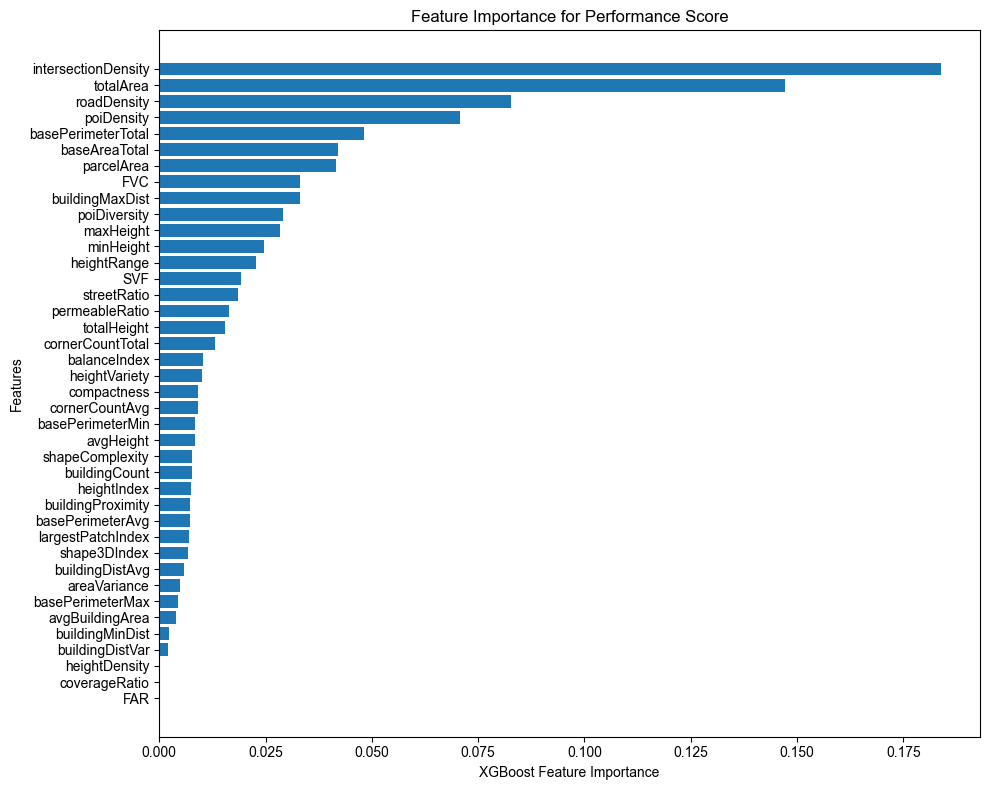

In [ ]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- 1. Data Preparation ---

# Assume 'grid500' DataFrame (with performance_score) and 'features' DataFrame are pre-loaded.
# Make sure that 'grid500' and 'features' have the same number of rows and are aligned.

# Define the target variable 'y'
y = grid500['performance_score_vertical']

# Define the feature matrix 'X'
# We will use your pre-loaded 'features' DataFrame.
X = grid500[features]

# Ensure X and y are aligned, dropping any rows with NaN in target or features
if X.shape[0] != y.shape[0]:
    print("Error: The number of rows in 'features' and 'grid500' do not match.")
    # Handle error appropriately, e.g., by exiting or trying to align them based on an index.
else:
    # --- 2. Split Data into Training and Testing Sets ---
    # We split the data to evaluate the model on unseen data.
    # test_size=0.2 means 20% of the data will be used for testing.
    # random_state ensures the split is the same every time you run the code.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")

    # --- 3. Train XGBoost Model ---

    print("\nTraining XGBoost Regressor model...")
    # Initialize the XGBoost Regressor model with common parameters.
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              n_estimators=100, 
                              max_depth=5, 
                              learning_rate=0.1,
                              random_state=42)

    # Train the model on the TRAINING data.
    xg_reg.fit(X_train, y_train)
    print("Model training complete.")

    # --- 4. Make Predictions and Evaluate the Model ---
    
    # Make predictions on the TEST data.
    y_pred = xg_reg.predict(X_test)
    
    # Calculate evaluation metrics.
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\n--- Model Evaluation Metrics ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


    # --- 5. Get and Display Feature Importances ---

    # Get feature importance scores from the trained model.
    importances = xg_reg.feature_importances_

    # Create a DataFrame for better visualization.
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False) # Sort by importance

    print("\n--- Feature Importances ---")
    print(feature_importance_df)


    # --- 6. Visualize Feature Importances ---

    print("\nGenerating feature importance plot...")
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("XGBoost Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance for Performance Score")
    plt.gca().invert_yaxis() # Display the most important feature at the top
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig('feature_importance.png')
    print("Plot saved as 'feature_importance.png'.")
    
    # To display the plot in an interactive environment (like Jupyter), you would use:
    # plt.show()

#### distance to surface

Normalizing data...
Creating a smooth surface model using RBFInterpolator...
Calculating shortest Euclidean distances...
Building KDTree from 90000 surface points...
Calculating performance score based on shortest distance...

Calculation complete.
Columns 'shortest_distance' and 'performance_score_shortest' have been added to the 'grid500' DataFrame.

Results preview:
   log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv  shortest_distance  \
0               0.36           0.67               0.47               0.21   
1               0.36           0.45               0.47               0.31   
2               0.46           0.36               0.47               0.29   
3               0.47           0.49               0.47               0.24   
4               0.40           0.00               0.47               0.40   

   performance_score_shortest  
0                        0.70  
1                        0.55  
2                        0.58  
3                        0.66  
4    

AttributeError: 'tuple' object has no attribute 'size'

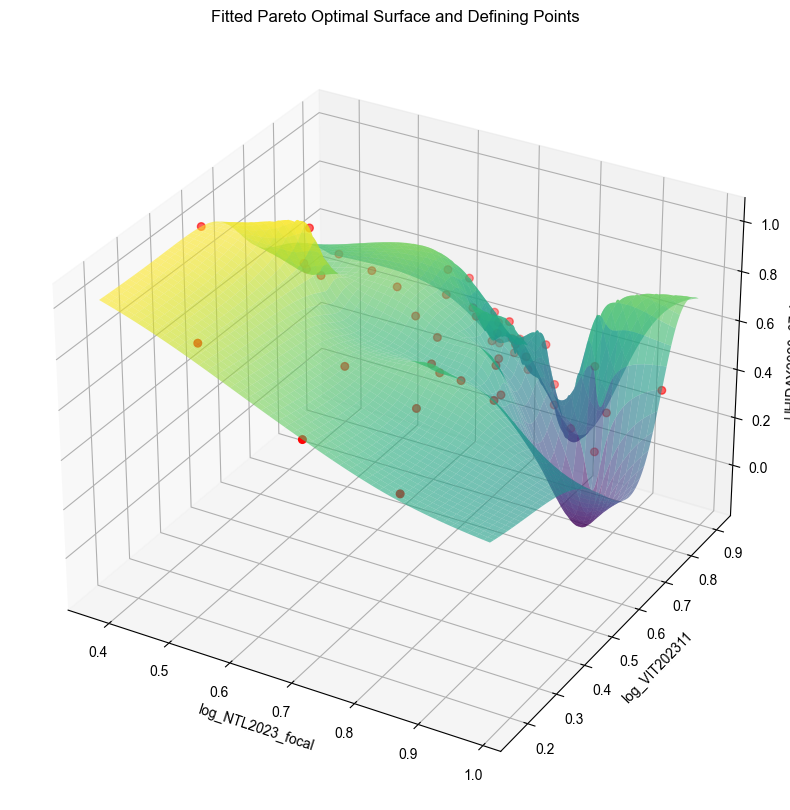

In [ ]:
# --- 1. 数据归一化 ---
print("Normalizing data...")
scaler = MinMaxScaler()
combined_data = pd.concat([df_pareto_centers[required_cols], grid500[required_cols]], axis=0)
scaler.fit(combined_data)
surface_data_normalized = scaler.transform(df_pareto_centers[required_cols])
sample_data_normalized = scaler.transform(grid500[required_cols])

df_surface_norm = pd.DataFrame(surface_data_normalized, columns=required_cols)
df_sample_norm = pd.DataFrame(sample_data_normalized, columns=required_cols)


# --- 2. 使用RBF插值器创建平滑曲面模型 ---
print("Creating a smooth surface model using RBFInterpolator...")
rbf_model = RBFInterpolator(df_surface_norm[[x_col, y_col]], df_surface_norm[z_col], kernel='thin_plate_spline')


# --- 3. 计算到曲面的最短欧氏距离 ---
print("Calculating shortest Euclidean distances...")
# 步骤 A: 创建RBF曲面的密集点云表示
grid_resolution = 300
x_min, y_min, _ = df_surface_norm.min()
x_max, y_max, _ = df_surface_norm.max()
x_dense = np.linspace(x_min, x_max, grid_resolution)
y_dense = np.linspace(y_min, y_max, grid_resolution)
Xg, Yg = np.meshgrid(x_dense, y_dense)
XY_grid = np.vstack([Xg.ravel(), Yg.ravel()]).T
Zg = rbf_model(XY_grid)
surface_points_dense = np.hstack([XY_grid, Zg.reshape(-1, 1)])

# 步骤 B: 为曲面上的点构建KDTree以便快速查找
print(f"Building KDTree from {len(surface_points_dense)} surface points...")
tree = KDTree(surface_points_dense)

# 步骤 C: 查询KDTree以找到每个样本点的最短距离
sample_points = df_sample_norm[[x_col, y_col, z_col]].values
distances, _ = tree.query(sample_points)

# 将计算出的距离作为一个新列添加到grid500中
grid500['shortest_distance'] = distances


# --- 4. 根据最短距离计算绩效得分 ---
print("Calculating performance score based on shortest distance...")
max_dist = distances.max()
performance_score_shortest = 1 - (distances / (max_dist + 1e-9))

# 将绩效得分作为一个新列添加到grid500中
grid500['performance_score_shortest'] = performance_score_shortest


# --- 5. 显示结果 ---
print("\nCalculation complete.")
print("Columns 'shortest_distance' and 'performance_score_shortest' have been added to the 'grid500' DataFrame.")
print("\nResults preview:")
print(grid500[[x_col, y_col, z_col, 'shortest_distance', 'performance_score_shortest']].head())

# --- 6. 生成拟合曲面的图像 ---
print("\nGenerating 3D visualization...")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制平滑的帕累托曲面
ax.plot_surface(Xg, Yg, Zg.reshape(Xg.shape), cmap='viridis', alpha=0.6, label='Fitted Pareto Surface')

# 绘制用于定义曲面的原始帕累托点
ax.scatter(df_surface_norm[x_col], df_surface_norm[y_col], df_surface_norm[z_col], 
           c='red', 
           s=30,
           depthshade=True,
           label='Pareto Points')

# 设置标签和标题
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('Fitted Pareto Optimal Surface and Defining Points')
ax.legend()

Using pre-loaded DataFrames: 'df_pareto_centers' and 'grid500'.
Fitting a smooth polynomial surface...

Generating 3D visualization...
Visualization saved as 'pareto_surface_visualization.png'.

Calculation complete.
Columns 'distance_to_surface' and 'performance_score' have been added to the 'grid500' DataFrame.

Preview of the results:
   log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv  distance_to_surface  \
0               0.36           0.67               0.47                 0.22   
1               0.36           0.45               0.47                 0.45   
2               0.46           0.36               0.47                 0.50   
3               0.47           0.49               0.47                 0.45   
4               0.40           0.00               0.47                 1.09   
5               0.36           0.49               0.47                 0.41   
6               0.49           0.57               0.47                 0.41   
7               0.54        

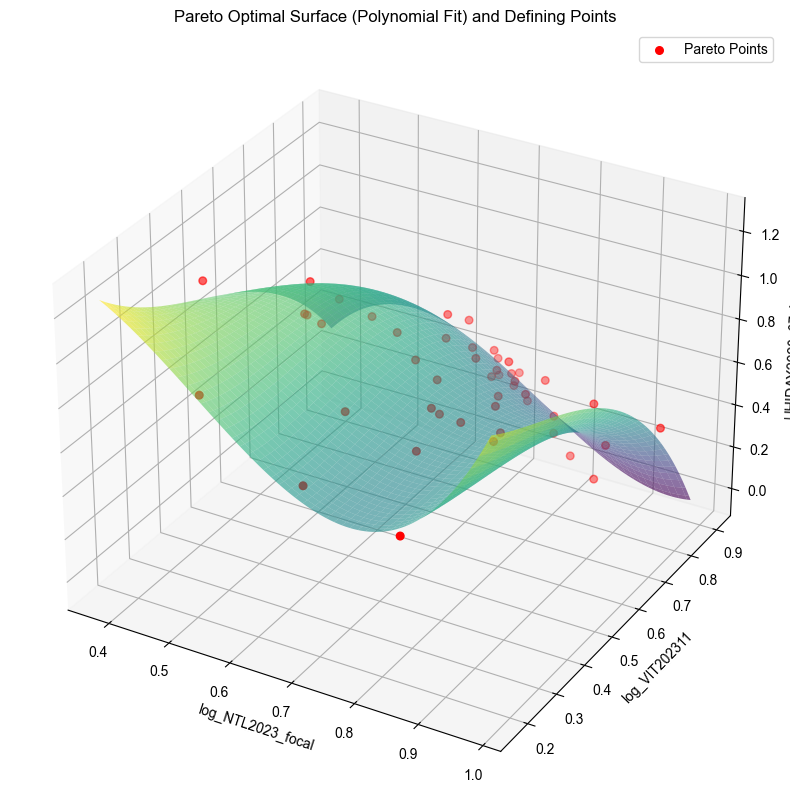

In [ ]:
# Import necessary libraries
# pandas is used for data manipulation and reading CSV files.
# numpy is used for numerical operations, especially for creating the grid.
# matplotlib.pyplot is for creating plots and visualizations.
# mpl_toolkits.mplot3d is required for 3D plotting.
# scipy.spatial.KDTree is used for efficiently finding the nearest neighbors in a point cloud.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from scipy.spatial import KDTree

# --- 1. Data Preparation (using pre-loaded DataFrames) ---

# Assume 'df_pareto_centers' is your pre-loaded DataFrame for the surface.
# Assume 'grid500' is your pre-loaded DataFrame for the sample points.
surface_data = df_pareto_centers

print("Using pre-loaded DataFrames: 'df_pareto_centers' and 'grid500'.")

# Define variables for the original column names to be used.
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'

# Check if all required columns exist in the surface data
required_cols = [x_col, y_col, z_col]
if not all(col in surface_data.columns for col in required_cols):
    print(f"Error: One or more required columns {required_cols} not found in 'df_pareto_centers'.")
    exit()

# Extract the 3D points that define the surface.
surface_points = surface_data[[x_col, y_col, z_col]].values
x_pts = surface_points[:, 0]
y_pts = surface_points[:, 1]
z_pts = surface_points[:, 2]


# --- 2. Surface Fitting using 2D Polynomial Regression ---
print("Fitting a smooth polynomial surface...")
polynomial_degree = 3
A = np.c_[np.ones(x_pts.size), x_pts, y_pts,
          x_pts**2, x_pts*y_pts, y_pts**2,
          x_pts**3, x_pts**2*y_pts, x_pts*y_pts**2, y_pts**3]
coeffs, _, _, _ = np.linalg.lstsq(A, z_pts, rcond=None)


# --- 4. Calculate Vertical Distance to Surface ---
sample_x = sample_data[x_col].values
sample_y = sample_data[y_col].values
z_on_surface = (coeffs[0] + coeffs[1]*sample_x + coeffs[2]*sample_y +
                coeffs[3]*sample_x**2 + coeffs[4]*sample_x*sample_y + coeffs[5]*sample_y**2 +
                coeffs[6]*sample_x**3 + coeffs[7]*sample_x**2*sample_y + coeffs[8]*sample_x*sample_y**2 + coeffs[9]*sample_y**3)
z_actual = sample_data[z_col].values
distances = np.abs(z_actual - z_on_surface)
sample_data['distance_to_surface'] = distances


# --- 5. Calculate Comprehensive Performance Score ---
max_dist = distances.max()
performance_score = 1 - (distances / (max_dist + 1e-9)) # Added epsilon to avoid division by zero
grid500['performance_score'] = performance_score


# --- 6. Visualize Surface and Pareto Points ---
print("\nGenerating 3D visualization...")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a specific grid for plotting to avoid variable name conflicts
grid_resolution = 100
x_grid_surf = np.linspace(x_pts.min(), x_pts.max(), grid_resolution)
y_grid_surf = np.linspace(y_pts.min(), y_pts.max(), grid_resolution)
X_surf, Y_surf = np.meshgrid(x_grid_surf, y_grid_surf)

# Evaluate the fitted polynomial on the new grid
Z_surf = (coeffs[0] + coeffs[1]*X_surf + coeffs[2]*Y_surf +
          coeffs[3]*X_surf**2 + coeffs[4]*X_surf*Y_surf + coeffs[5]*Y_surf**2 +
          coeffs[6]*X_surf**3 + coeffs[7]*X_surf**2*Y_surf + coeffs[8]*X_surf*Y_surf**2 + coeffs[9]*Y_surf**3)

# Plot the smooth Pareto surface with the new variables
ax.plot_surface(X_surf, Y_surf, Z_surf, cmap='viridis', alpha=0.6)

# Plot the original Pareto points
ax.scatter(surface_points[:, 0], surface_points[:, 1], surface_points[:, 2],
           c='red',
           s=30,
           depthshade=True,
           label='Pareto Points')

# Set labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('Pareto Optimal Surface (Polynomial Fit) and Defining Points')
ax.legend()
plt.savefig('pareto_surface_visualization.png')
print("Visualization saved as 'pareto_surface_visualization.png'.")


# --- 7. Display Results ---
print("\nCalculation complete.")
print("Columns 'distance_to_surface' and 'performance_score' have been added to the 'grid500' DataFrame.")
print("\nPreview of the results:")
print(grid500[[x_col, y_col, z_col, 'distance_to_surface', 'performance_score']].head(10))

In [ ]:
# --- 1. Data Preparation (using pre-loaded DataFrames) ---

# Assume 'df_pareto_centers' is your pre-loaded DataFrame for the surface.
# Assume 'grid500' is your pre-loaded DataFrame for the sample points.
surface_data = df_pareto_centers

print("Using pre-loaded DataFrames: 'df_pareto_centers' and 'grid500'.")

# Define variables for the original column names to be used.
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'

# Check if all required columns exist in the surface data
required_cols = [x_col, y_col, z_col]
if not all(col in surface_data.columns for col in required_cols):
    print(f"Error: One or more required columns {required_cols} not found in 'df_pareto_centers'.")
    exit()

# Extract the 3D points that define the surface.
surface_points = surface_data[[x_col, y_col, z_col]].values
x_pts = surface_points[:, 0]
y_pts = surface_points[:, 1]
z_pts = surface_points[:, 2]


# --- 2. Surface Fitting using 2D Polynomial Regression ---
print("Fitting a smooth polynomial surface...")
polynomial_degree = 3
A = np.c_[np.ones(x_pts.size), x_pts, y_pts,
          x_pts**2, x_pts*y_pts, y_pts**2,
          x_pts**3, x_pts**2*y_pts, x_pts*y_pts**2, y_pts**3]
coeffs, _, _, _ = np.linalg.lstsq(A, z_pts, rcond=None)


# --- 4. Calculate Vertical Distance to Surface ---
sample_x = sample_data[x_col].values
sample_y = sample_data[y_col].values
z_on_surface = (coeffs[0] + coeffs[1]*sample_x + coeffs[2]*sample_y +
                coeffs[3]*sample_x**2 + coeffs[4]*sample_x*sample_y + coeffs[5]*sample_y**2 +
                coeffs[6]*sample_x**3 + coeffs[7]*sample_x**2*sample_y + coeffs[8]*sample_x*sample_y**2 + coeffs[9]*sample_y**3)
z_actual = sample_data[z_col].values
distances = np.abs(z_actual - z_on_surface)
sample_data['distance_to_surface'] = distances


# --- 5. Calculate Comprehensive Performance Score ---
max_dist = distances.max()
performance_score = 1 - (distances / (max_dist + 1e-9)) # Added epsilon to avoid division by zero
grid500['performance_score'] = performance_score


# --- 6. Visualize Surface and Pareto Points ---
print("\nGenerating 3D visualization...")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a specific grid for plotting to avoid variable name conflicts
grid_resolution = 100
x_grid_surf = np.linspace(x_pts.min(), x_pts.max(), grid_resolution)
y_grid_surf = np.linspace(y_pts.min(), y_pts.max(), grid_resolution)
X_surf, Y_surf = np.meshgrid(x_grid_surf, y_grid_surf)

# Evaluate the fitted polynomial on the new grid
Z_surf = (coeffs[0] + coeffs[1]*X_surf + coeffs[2]*Y_surf +
          coeffs[3]*X_surf**2 + coeffs[4]*X_surf*Y_surf + coeffs[5]*Y_surf**2 +
          coeffs[6]*X_surf**3 + coeffs[7]*X_surf**2*Y_surf + coeffs[8]*X_surf*Y_surf**2 + coeffs[9]*Y_surf**3)

# Plot the smooth Pareto surface with the new variables
ax.plot_surface(X_surf, Y_surf, Z_surf, cmap='viridis', alpha=0.6)

# Plot the original Pareto points
ax.scatter(surface_points[:, 0], surface_points[:, 1], surface_points[:, 2],
           c='red',
           s=30,
           depthshade=True,
           label='Pareto Points')

# Set labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('Pareto Optimal Surface (Polynomial Fit) and Defining Points')
ax.legend()
plt.savefig('pareto_surface_visualization.png')
print("Visualization saved as 'pareto_surface_visualization.png'.")


# --- 7. Display Results ---
print("\nCalculation complete.")
print("Columns 'distance_to_surface' and 'performance_score' have been added to the 'grid500' DataFrame.")
print("\nPreview of the results:")
print(grid500[[x_col, y_col, z_col, 'distance_to_surface', 'performance_score']].head(10))

In [ ]:
grid500.head()

Global_ID     City  NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
0          0  Beijing     6.18           7.03    1649.86               0.47   
1          1  Beijing     5.74           7.23     155.86               0.47   
2          2  Beijing    11.32          13.62      57.14               0.47   
3          3  Beijing    11.73          14.36     243.57               0.47   
4          4  Beijing     8.45           9.19       0.00               0.47   

   buildingCount  totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
0             31        93.00       3.00       3.00       3.00         0.00   
1             29        87.00       3.00       3.00       3.00         0.00   
2             22        66.00       3.00       3.00       3.00         0.00   
3              8        24.00       3.00       3.00       3.00         0.00   
4              0         0.00       0.00       0.00       0.00         0.00   

   heightIndex  heightDensity  heightVariety  cornerCountTotal  \
0         0.03           0.00           0.00               180   
1         0.03           0.00           0.00               149   
2         0.05           0.00           0.00               117   
3         0.12           0.00           0.00                42   
4         0.00           0.00           0.00                 0   

   basePerimeterTotal  basePerimeterAvg  basePerimeterMax  basePerimeterMin  \
0             6500.98            209.71            831.63             32.55   
1             3810.39            131.39            272.14             15.33   
2             3645.40            165.70            668.26             28.73   
3             1147.60            143.45            283.01             75.66   
4                0.00              0.00              0.00              0.00   

   shapeComplexity  compactness  baseAreaTotal  totalArea  areaVariance  \
0             5.07         0.56       88704.58   88704.58   50961857.70   
1             5.17         0.62       33119.49   33119.49    1261729.88   
2             4.92         0.56       51092.86   51092.86   30358745.83   
3             5.70         0.60        8534.61    8534.61     958399.89   
4             0.00         0.00           0.00       0.00          0.00   

   avgBuildingArea  parcelArea  largestPatchIndex  shape3DIndex  SVF  \
0          2861.44   132998.25               0.47          0.01 0.80   
1          1142.05   196625.22               0.67          0.26 0.89   
2          2322.40   132197.31               0.53          0.01 0.90   
3          1066.83   205685.37               0.82          0.02 0.95   
4             0.00       99.15               0.00          0.00 0.98   

   balanceIndex  FAR  coverageRatio  FVC  permeableRatio  poiDensity  \
0        234.60 0.35           0.35 0.84            0.89        4.00   
1         35.66 0.13           0.13 0.86            0.94       12.00   
2        151.50 0.20           0.20 0.88            0.93        0.00   
3         15.54 0.03           0.03 0.93            0.98        0.00   
4          0.00 0.00           0.00 0.82            0.98       16.00   

   poiDiversity  streetRatio  roadDensity  intersectionDensity  \
0          0.00         0.20            5                    1   
1          0.64         0.20            7                    1   
2          0.00         0.20            1                    0   
3          0.00         0.20            3                    1   
4          0.69         0.00            1                    1   

   cornerCountAvg  buildingProximity  buildingMinDist  buildingMaxDist  \
0            5.81              52.56            14.99           620.94   
1            5.14              34.22             6.82           594.16   
2            5.32              47.90            17.34           610.84   
3            5.25              35.93            13.49           474.17   
4            0.00               0.00             0.00             0.00   

   buildingDistAvg  bu

In [139]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- 1. Data Preparation ---

# Assume 'grid500' DataFrame (with performance_score) and 'features' DataFrame are pre-loaded.
# Make sure that 'grid500' and 'features' have the same number of rows and are aligned.

# Define the target variable 'y'
y = grid500['performance_score_shortest']
# y = grid500['shortest_distance']

# Define the feature matrix 'X'
# We will use your pre-loaded 'features' DataFrame.
X = grid500[features]

# Ensure X and y are aligned, dropping any rows with NaN in target or features
if X.shape[0] != y.shape[0]:
    print("Error: The number of rows in 'features' and 'grid500' do not match.")
    # Handle error appropriately, e.g., by exiting or trying to align them based on an index.
else:
    # --- 2. Split Data into Training and Testing Sets ---
    # We split the data to evaluate the model on unseen data.
    # test_size=0.2 means 20% of the data will be used for testing.
    # random_state ensures the split is the same every time you run the code.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")

    # --- 3. Train XGBoost Model ---

    print("\nTraining XGBoost Regressor model...")
    # Initialize the XGBoost Regressor model with common parameters.
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              n_estimators=100, 
                              max_depth=5, 
                              learning_rate=0.1,
                              random_state=42)

    # Train the model on the TRAINING data.
    xg_reg.fit(X_train, y_train)
    print("Model training complete.")

    # --- 4. Make Predictions and Evaluate the Model ---
    
    # Make predictions on the TEST data.
    y_pred = xg_reg.predict(X_test)
    
    # Calculate evaluation metrics.
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\n--- Model Evaluation Metrics ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


    # --- 5. Get and Display Feature Importances ---

    # Get feature importance scores from the trained model.
    importances = xg_reg.feature_importances_

    # Create a DataFrame for better visualization.
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False) # Sort by importance

    print("\n--- Feature Importances ---")
    print(feature_importance_df)


    # --- 6. Visualize Feature Importances ---

    print("\nGenerating feature importance plot...")
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("XGBoost Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance for Performance Score")
    plt.gca().invert_yaxis() # Display the most important feature at the top
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig('feature_importance.png')
    print("Plot saved as 'feature_importance.png'.")
    
    # To display the plot in an interactive environment (like Jupyter), you would use:
    # plt.show()

KeyError: 'performance_score_shortest'

In [138]:
gdb_path = r"D:\008RA\gis_process\CN_City36\CN_City36_t1.gdb"
layer_name = "全国网格"

gdf = gpd.read_file(gdb_path, layer=layer_name)

gdf_joined = gdf.merge(sample_data, on="Global_ID", how="left")

output_gdb = r"D:\008RA\gis_process\CN_City36\CN_City36_t2.gdb"
output_layer = "全国网格_绩效t6"

pyogrio.write_dataframe(
    gdf_joined,
    output_gdb,
    layer=output_layer,
    driver="OpenFileGDB"
)

In [ ]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14               0.37   
std     56862.94     19.36          17.87    1821.23               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     49033.00     15.06          15.64     206.86               0.30   
50%     97800.00     25.85          26.01     731.14               0.38   
75%    147135.00     38.67          38.17    2003.43               0.47   
max    196769.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    194941.00    194941.00      194941.00      194941.00   
mean         20.83         0.10           0.00           0.30   
std          23.99         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      194941.00  194941.00       194941.00        194941.00   194941.00   
mean        33192.68  216494.27    191423545.70          5437.01   180006.93   
std         27474.13  210010.02   2300870309.71          7776.02    80149.49   
min             0.00       0.00            0.00             0.00        0.00   
25%          8888.17   37241.51      3519241.57          1875.57   131267.14   
50%         29057.71  157756.72     20726892.83          4027.77   222107.39   
75%         51784.69  347326.83     74777609.98          6726.97   238506.86   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          194941.00     194941.00 194941.00     19

In [ ]:
performances = ['vertical_distance_society', 'vertical_distance_economy']
grid500_2 = grid500.dropna(subset=performances)

In [ ]:
grid500_2.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  193112.00 187918.00      193112.00  193112.00          193112.00   
mean    97212.01     28.93          28.70    1413.82               0.37   
std     56326.91     19.41          17.91    1820.84               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     48575.75     15.09          15.66     206.86               0.30   
50%     96885.50     25.88          26.05     731.43               0.38   
75%    145763.25     38.72          38.24    2002.18               0.47   
max    194940.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      193112.00    193112.00  193112.00  193112.00  193112.00   
mean           46.80       895.84      16.52      30.39       9.57   
std            51.12      1038.07       8.73      24.26       4.92   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       560.00      16.68      27.00      12.00   
75%            65.00      1318.50      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    193112.00    193112.00      193112.00      193112.00   
mean         20.82         0.10           0.00           0.30   
std          23.98         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         193112.00           193112.00         193112.00   
mean             316.00             4964.54            111.96   
std              353.32             4253.10             60.51   
min                0.00                0.00              0.00   
25%               72.00             1413.37             82.87   
50%              222.00             4203.95            110.64   
75%              446.00             7523.54            137.24   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         193112.00         193112.00        193112.00    193112.00   
mean             347.59             22.62             4.55         0.54   
std              230.18             35.79             1.41         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.28              4.31             4.56         0.53   
50%              318.98             14.00             4.82         0.57   
75%              461.53             28.32             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      193112.00  193112.00       193112.00        193112.00   193112.00   
mean        33215.91  216636.58    192074987.23          5435.81   180055.19   
std         27497.97  210134.21   2311138528.27          7791.35    80130.54   
min             0.00       0.00            0.00             0.00        0.00   
25%          8872.52   37138.83      3504790.50          1869.58   131412.26   
50%         29097.73  157999.32     20686237.49          4023.74   222132.05   
75%         51836.61  347715.69     74734110.78          6724.49   238526.35   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          193112.00     193112.00 193112.00     19

Data split into training (154489 rows) and testing (38623 rows) sets.

Training XGBoost Regressor model...
Model training complete.

--- Model Evaluation Metrics ---
R-squared (R²): 0.0576
Mean Squared Error (MSE): 0.0173
Mean Absolute Error (MAE): 0.1082

--- Feature Importances ---
                feature  importance
18            minHeight        0.11
16       permeableRatio        0.08
25     basePerimeterMin        0.06
26      shapeComplexity        0.06
13           poiDensity        0.05
38                  SVF        0.04
15                  FVC        0.03
19          heightRange        0.03
11          roadDensity        0.03
4      basePerimeterAvg        0.03
8       avgBuildingArea        0.03
32       cornerCountAvg        0.03
2             avgHeight        0.03
17            maxHeight        0.02
33    buildingProximity        0.02
23     cornerCountTotal        0.02
28           parcelArea        0.02
20          heightIndex        0.02
5           compactness        

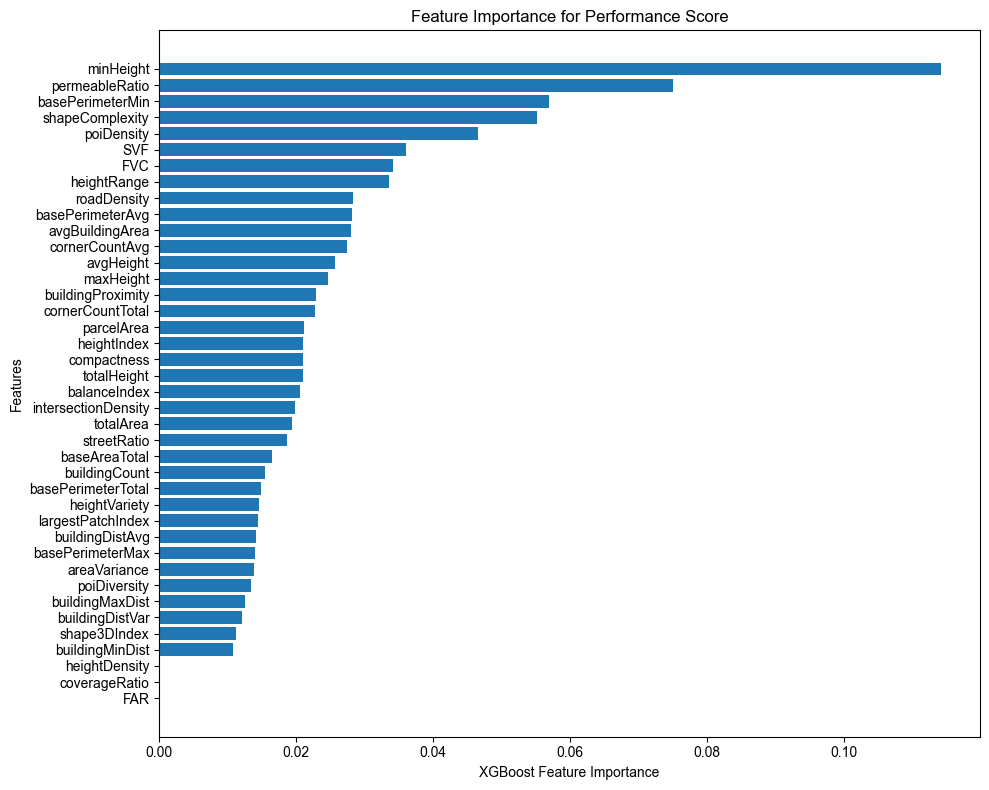

In [ ]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- 1. Data Preparation ---

# Assume 'grid500' DataFrame (with performance_score) and 'features' DataFrame are pre-loaded.
# Make sure that 'grid500' and 'features' have the same number of rows and are aligned.

# Define the target variable 'y'
y = grid500_2['performance_score_economy']

# Define the feature matrix 'X'
# We will use your pre-loaded 'features' DataFrame.
X = grid500_2[features]

# Ensure X and y are aligned, dropping any rows with NaN in target or features
if X.shape[0] != y.shape[0]:
    print("Error: The number of rows in 'features' and 'grid500' do not match.")
    # Handle error appropriately, e.g., by exiting or trying to align them based on an index.
else:
    # --- 2. Split Data into Training and Testing Sets ---
    # We split the data to evaluate the model on unseen data.
    # test_size=0.2 means 20% of the data will be used for testing.
    # random_state ensures the split is the same every time you run the code.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")

    # --- 3. Train XGBoost Model ---

    print("\nTraining XGBoost Regressor model...")
    # Initialize the XGBoost Regressor model with common parameters.
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              n_estimators=100, 
                              max_depth=5, 
                              learning_rate=0.1,
                              random_state=42)

    # Train the model on the TRAINING data.
    xg_reg.fit(X_train, y_train)
    print("Model training complete.")

    # --- 4. Make Predictions and Evaluate the Model ---
    
    # Make predictions on the TEST data.
    y_pred = xg_reg.predict(X_test)
    
    # Calculate evaluation metrics.
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\n--- Model Evaluation Metrics ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


    # --- 5. Get and Display Feature Importances ---

    # Get feature importance scores from the trained model.
    importances = xg_reg.feature_importances_

    # Create a DataFrame for better visualization.
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False) # Sort by importance

    print("\n--- Feature Importances ---")
    print(feature_importance_df)


    # --- 6. Visualize Feature Importances ---

    print("\nGenerating feature importance plot...")
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("XGBoost Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance for Performance Score")
    plt.gca().invert_yaxis() # Display the most important feature at the top
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig('feature_importance.png')
    print("Plot saved as 'feature_importance.png'.")
    
    # To display the plot in an interactive environment (like Jupyter), you would use:
    # plt.show()

# PPF (High-density)

In [ ]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14               0.37   
std     56862.94     19.36          17.87    1821.23               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     49033.00     15.06          15.64     206.86               0.30   
50%     97800.00     25.85          26.01     731.14               0.38   
75%    147135.00     38.67          38.17    2003.43               0.47   
max    196769.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightVariety  \
count    194941.00    194941.00      194941.00      194941.00   
mean         20.83         0.10           0.00           0.30   
std          23.99         0.17           0.00           0.28   
min           0.00         0.00           0.00           0.00   
25%           0.00         0.02           0.00           0.00   
50%          15.00         0.04           0.00           0.28   
75%          28.00         0.09           0.01           0.43   
max         532.00         1.00           0.09           2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       baseAreaTotal  totalArea    areaVariance  avgBuildingArea  parcelArea  \
count      194941.00  194941.00       194941.00        194941.00   194941.00   
mean        33192.68  216494.27    191423545.70          5437.01   180006.93   
std         27474.13  210010.02   2300870309.71          7776.02    80149.49   
min             0.00       0.00            0.00             0.00        0.00   
25%          8888.17   37241.51      3519241.57          1875.57   131267.14   
50%         29057.71  157756.72     20726892.83          4027.77   222107.39   
75%         51784.69  347326.83     74777609.98          6726.97   238506.86   
max        226640.62 3672930.95 662000000000.00        664544.83   250000.00   

       largestPatchIndex  shape3DIndex       SVF  balanceIndex       FAR  \
count          194941.00     194941.00 194941.00     19

In [ ]:
grid500_high = grid500[grid500["FAR"] >=2.5]
grid500_high.shape

(8919, 51)

In [ ]:
# Apply transformation
surface_data_normalized = scaler.transform(df_pareto_centers[required_cols])
sample_data_normalized = scaler.transform(grid500_high[required_cols])

df_surface_norm = pd.DataFrame(surface_data_normalized, columns=required_cols)
df_sample_norm = pd.DataFrame(sample_data_normalized, columns=required_cols)

Using pre-loaded DataFrames: 'df_pareto_centers' and 'grid500'.
Fitting a smooth polynomial surface...

Generating 3D visualization...
Visualization saved as 'pareto_surface_visualization.png'.

Calculation complete.
Columns 'distance_to_surface' and 'performance_score' have been added to the 'grid500' DataFrame.

Preview of the results:
      log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv  \
447                0.47           0.59               0.29   
674                0.42           0.71               0.25   
930                0.62           0.56               0.47   
931                0.63           0.57               0.47   
1066               0.59           0.73               0.23   

      distance_to_surface  performance_score  
447                  0.50               0.95  
674                  0.84               0.92  
930                  0.13               0.99  
931                  0.15               0.99  
1066                 0.62               0.94  


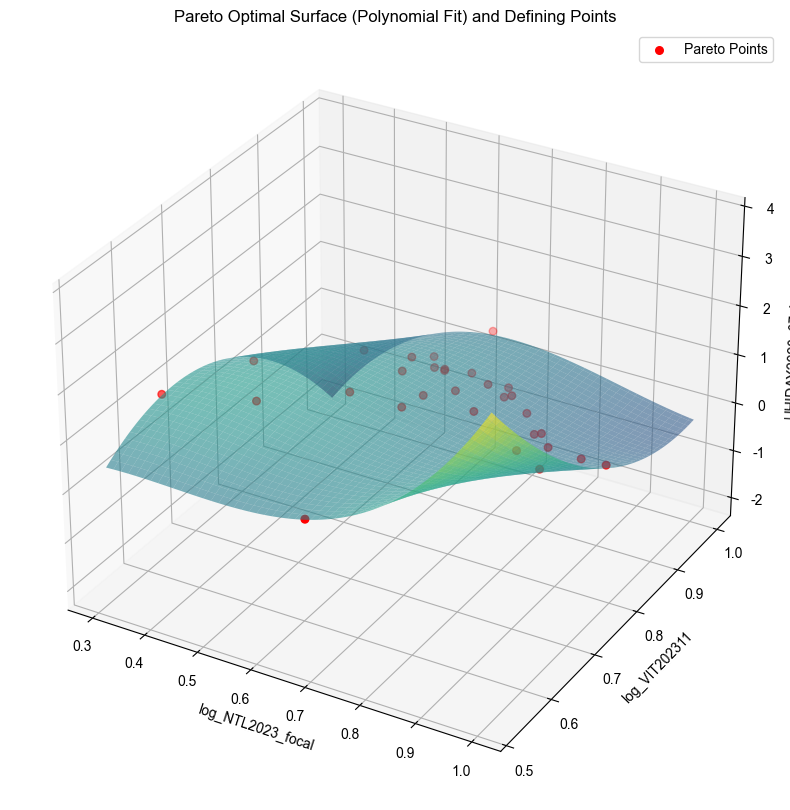

In [ ]:
# Import necessary libraries
# pandas is used for data manipulation and reading CSV files.
# numpy is used for numerical operations, especially for creating the grid.
# matplotlib.pyplot is for creating plots and visualizations.
# mpl_toolkits.mplot3d is required for 3D plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# --- 1. Data Preparation (using pre-loaded DataFrames) ---

# Assume 'df_pareto_centers' is your pre-loaded DataFrame for the surface.
# Assume 'grid500' is your pre-loaded DataFrame for the sample points.
surface_data = df_pareto_centers
sample_data = grid500_high

print("Using pre-loaded DataFrames: 'df_pareto_centers' and 'grid500'.")

# Define variables for the original column names to be used.
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'

# Check if all required columns exist in the surface data
required_cols = [x_col, y_col, z_col]
if not all(col in surface_data.columns for col in required_cols):
    print(f"Error: One or more required columns {required_cols} not found in 'df_pareto_centers'.")
    exit()

# Extract the 3D points that define the surface.
surface_points = surface_data[[x_col, y_col, z_col]].values
x_pts = surface_points[:, 0]
y_pts = surface_points[:, 1]
z_pts = surface_points[:, 2]


# --- 2. Surface Fitting using 2D Polynomial Regression ---
# This method fits a smooth surface that approximates the points, rather than interpolating through them.
print("Fitting a smooth polynomial surface...")

# Define the degree of the polynomial. Higher degrees are more flexible but can overfit.
polynomial_degree = 3

# Create the design matrix (Vandermonde matrix) for the polynomial features
A = np.c_[np.ones(x_pts.size), x_pts, y_pts,
          x_pts**2, x_pts*y_pts, y_pts**2,
          x_pts**3, x_pts**2*y_pts, x_pts*y_pts**2, y_pts**3]

# Solve for the polynomial coefficients using a least-squares fit
coeffs, _, _, _ = np.linalg.lstsq(A, z_pts, rcond=None)

# Create a grid for plotting the smooth surface
grid_resolution = 100
x_grid = np.linspace(x_pts.min(), x_pts.max(), grid_resolution)
y_grid = np.linspace(y_pts.min(), y_pts.max(), grid_resolution)
X, Y = np.meshgrid(x_grid, y_grid)

# Evaluate the fitted polynomial on the grid to get the Z values for the surface
Z = (coeffs[0] + coeffs[1]*X + coeffs[2]*Y + 
     coeffs[3]*X**2 + coeffs[4]*X*Y + coeffs[5]*Y**2 +
     coeffs[6]*X**3 + coeffs[7]*X**2*Y + coeffs[8]*X*Y**2 + coeffs[9]*Y**3)


# --- 3. Check Sample Data ---
if not all(col in sample_data.columns for col in required_cols):
    print(f"Error: One or more required columns {required_cols} not found in 'grid500'.")
    exit()


# --- 4. Calculate Vertical Distance to Surface ---

# Extract the (x, y) coordinates from the sample data.
sample_x = sample_data[x_col].values
sample_y = sample_data[y_col].values

# Evaluate the polynomial at the sample points' coordinates to find z on the surface
z_on_surface = (coeffs[0] + coeffs[1]*sample_x + coeffs[2]*sample_y +
                coeffs[3]*sample_x**2 + coeffs[4]*sample_x*sample_y + coeffs[5]*sample_y**2 +
                coeffs[6]*sample_x**3 + coeffs[7]*sample_x**2*sample_y + coeffs[8]*sample_x*sample_y**2 + coeffs[9]*sample_y**3)

# Get the actual z-value for each sample point.
z_actual = sample_data[z_col].values

# Calculate the absolute vertical distance.
distances = np.abs(z_actual - z_on_surface)

# Add the calculated distances as a new column to the dataframe.
sample_data['distance_to_surface'] = distances


# --- 5. Calculate Comprehensive Performance Score ---

# The performance is defined as 1 minus the normalized distance.
min_dist = distances.min()
max_dist = distances.max()

# Normalize the distances to be between 0 and 1.
epsilon = 1e-9
normalized_distances = (distances - min_dist) / (max_dist - min_dist + epsilon)

# The performance score is 1 minus the normalized distance.
performance_score = 1 - normalized_distances

# Add the performance score as a new column.
sample_data['performance_score'] = performance_score


# --- 6. Visualize Surface and Pareto Points ---
print("\nGenerating 3D visualization...")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the smooth Pareto surface with some transparency
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot the original Pareto points that were used to define the surface.
ax.scatter(surface_points[:, 0], surface_points[:, 1], surface_points[:, 2], 
           c='red', 
           s=30, # size of points
           depthshade=True, # Add a shadow effect for depth
           label='Pareto Points')

# Set labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('Pareto Optimal Surface (Polynomial Fit) and Defining Points')
ax.legend()

# Save the figure
plt.savefig('pareto_surface_visualization.png')
print("Visualization saved as 'pareto_surface_visualization.png'.")


# --- 7. Display Results ---
print("\nCalculation complete.")
print("Columns 'distance_to_surface' and 'performance_score' have been added to the 'grid500' DataFrame.")
print("\nPreview of the results:")
print(sample_data[[x_col, y_col, z_col, 'distance_to_surface', 'performance_score']].head())

# If you wish to save the results to a new CSV file, you can uncomment the following line:
# sample_data.to_csv('grid500_with_scores.csv', index=False)
# print("\nResults saved to 'grid500_with_scores.csv'.")

Data split into training (7135 rows) and testing (1784 rows) sets.

Training XGBoost Regressor model...
Model training complete.

--- Model Evaluation Metrics ---
R-squared (R²): 0.0417
Mean Squared Error (MSE): 0.0829
Mean Absolute Error (MAE): 0.1215

--- Feature Importances ---
                feature  importance
39          streetRatio        0.30
38                  SVF        0.08
27         areaVariance        0.05
13           poiDensity        0.03
34      buildingMinDist        0.03
36      buildingDistAvg        0.03
30         shape3DIndex        0.03
25     basePerimeterMin        0.03
37      buildingDistVar        0.02
8       avgBuildingArea        0.02
28           parcelArea        0.02
11          roadDensity        0.02
32       cornerCountAvg        0.02
12  intersectionDensity        0.02
4      basePerimeterAvg        0.02
1           totalHeight        0.02
17            maxHeight        0.02
16       permeableRatio        0.02
7             totalArea        0.0

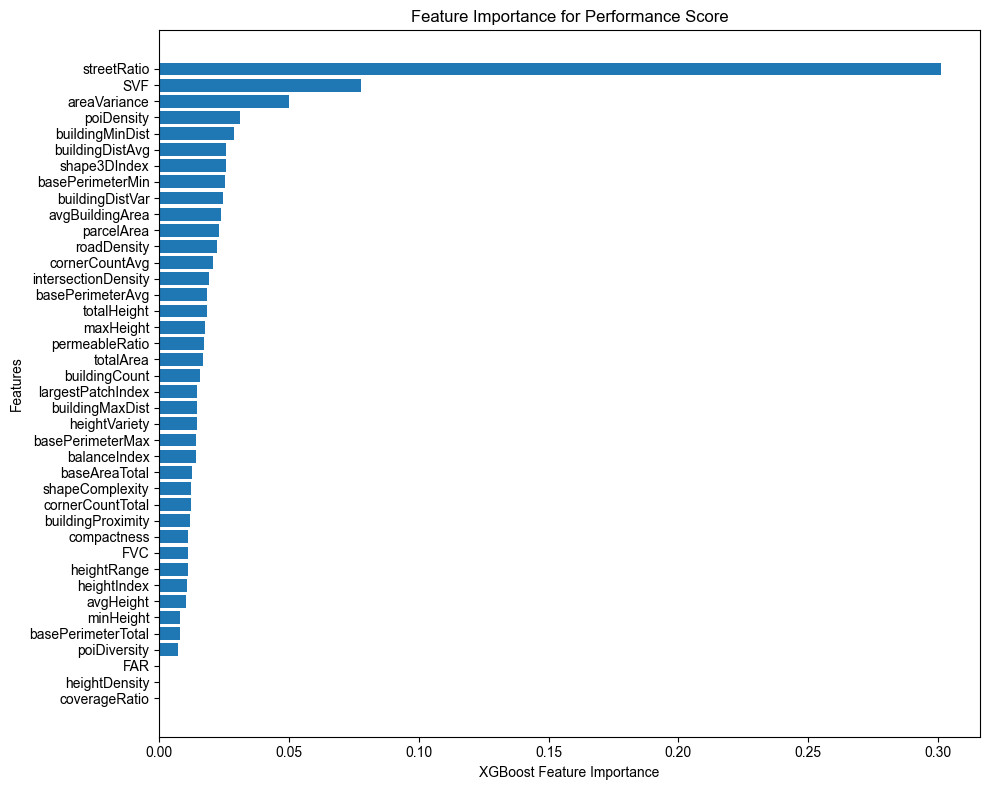

In [ ]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- 1. Data Preparation ---

# Assume 'grid500' DataFrame (with performance_score) and 'features' DataFrame are pre-loaded.
# Make sure that 'grid500' and 'features' have the same number of rows and are aligned.

# Define the target variable 'y'
y = grid500_high['distance_to_surface']

# Define the feature matrix 'X'
# We will use your pre-loaded 'features' DataFrame.
X = grid500_high[features]

# Ensure X and y are aligned, dropping any rows with NaN in target or features
if X.shape[0] != y.shape[0]:
    print("Error: The number of rows in 'features' and 'grid500' do not match.")
    # Handle error appropriately, e.g., by exiting or trying to align them based on an index.
else:
    # --- 2. Split Data into Training and Testing Sets ---
    # We split the data to evaluate the model on unseen data.
    # test_size=0.2 means 20% of the data will be used for testing.
    # random_state ensures the split is the same every time you run the code.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")

    # --- 3. Train XGBoost Model ---

    print("\nTraining XGBoost Regressor model...")
    # Initialize the XGBoost Regressor model with common parameters.
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              n_estimators=100, 
                              max_depth=5, 
                              learning_rate=0.1,
                              random_state=42)

    # Train the model on the TRAINING data.
    xg_reg.fit(X_train, y_train)
    print("Model training complete.")

    # --- 4. Make Predictions and Evaluate the Model ---
    
    # Make predictions on the TEST data.
    y_pred = xg_reg.predict(X_test)
    
    # Calculate evaluation metrics.
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\n--- Model Evaluation Metrics ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


    # --- 5. Get and Display Feature Importances ---

    # Get feature importance scores from the trained model.
    importances = xg_reg.feature_importances_

    # Create a DataFrame for better visualization.
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False) # Sort by importance

    print("\n--- Feature Importances ---")
    print(feature_importance_df)


    # --- 6. Visualize Feature Importances ---

    print("\nGenerating feature importance plot...")
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("XGBoost Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance for Performance Score")
    plt.gca().invert_yaxis() # Display the most important feature at the top
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig('feature_importance.png')
    print("Plot saved as 'feature_importance.png'.")
    
    # To display the plot in an interactive environment (like Jupyter), you would use:
    # plt.show()

#### Single PPF

In [ ]:
df_clean = grid500_high[['Global_ID'] + targets_processed].dropna()

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_clean[targets_processed])

df_scaled = pd.DataFrame(scaled_values, columns=targets_processed)
df_scaled['Global_ID'] = df_clean['Global_ID'].values

# keep Global_ID as first column for readability
df_scaled = df_scaled[['Global_ID'] + targets_processed]

# Store Global_ID for mapping later
global_ids = df_scaled['Global_ID'].values

# Normalize selected features for clustering
scaler = StandardScaler()
X_std = scaler.fit_transform(df_scaled[targets_processed].values)
from sklearn.cluster import KMeans
import pandas as pd
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
k_list = [500, 1000]  # Modify this list as needed
# k_list = [1000]
pareto_results = {}

for k in k_list:
    print(f"\n▶ Running KMeans for k = {k}")
    
    # Run KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_std)
    centers_std = kmeans.cluster_centers_
    centers_original = scaler.inverse_transform(centers_std)

    # Perform Pareto filtering
    F_inv = -1 * centers_original  # Convert to minimization problem
    nds = NonDominatedSorting()
    pareto_idx = nds.do(F_inv, only_non_dominated_front=True)
    pareto_centers = centers_original[pareto_idx]

    # Build output DataFrame
    df = pd.DataFrame(pareto_centers, columns=targets_processed)
    df['Global_ID'] = [f"cluster_{i}" for i in pareto_idx]
    df = df[['Global_ID'] + targets_processed]

    # Store the result
    pareto_results[f"k{k}"] = df
    print(f"✅ Selected {len(df)} Pareto-optimal cluster centers for k = {k}")


▶ Running KMeans for k = 500

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

✅ Selected 19 Pareto-optimal cluster centers for k = 500

▶ Running KMeans for k = 1000
✅ Selected 30 Pareto-optimal cluster centers for k = 1000


In [ ]:
df_pareto_centers = pareto_results['k1000']
df_pareto_centers.describe()

log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv
count              30.00          30.00              30.00
mean                0.68           0.82               0.54
std                 0.16           0.09               0.28
min                 0.30           0.52               0.11
25%                 0.59           0.79               0.31
50%                 0.67           0.84               0.55
75%                 0.78           0.88               0.66
max                 1.00           1.00               1.00

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# --- Assume DataFrames are Pre-loaded ---
# This script assumes you have already loaded your data into DataFrames named:
# 1. df_pareto_centers: Contains the points that define the optimal surface.
# 2. grid500: Contains the sample points for which you want to calculate the distance.

# Define the column names
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'
required_cols = [x_col, y_col, z_col]

# --- 1. Normalization ---
# It's good practice to normalize data before fitting.
print("Normalizing data...")
scaler = MinMaxScaler()
# Combine data to fit scaler on the global min/max
combined_data = pd.concat([df_pareto_centers[required_cols], grid500_high[required_cols]], axis=0)
scaler.fit(combined_data)
# Apply transformation
surface_data_normalized = scaler.transform(df_pareto_centers[required_cols])
sample_data_normalized = scaler.transform(grid500[required_cols])

df_surface_norm = pd.DataFrame(surface_data_normalized, columns=required_cols)
df_sample_norm = pd.DataFrame(sample_data_normalized, columns=required_cols)


# --- 2. Fit a Smooth Surface using Polynomial Regression ---
print("Fitting a smooth polynomial surface...")
# Set the flexibility of the surface. A higher degree can fit more complex shapes.
polynomial_degree = 3

# Prepare the data for regression from the normalized Pareto points
X_fit = df_surface_norm[x_col]
Y_fit = df_surface_norm[y_col]
Z_fit = df_surface_norm[z_col]

# Create the design matrix A for the polynomial equation z = c0 + c1*x + c2*y + c3*x^2 + ...
A = np.c_[np.ones(X_fit.shape[0]), X_fit, Y_fit, X_fit**2, X_fit*Y_fit, Y_fit**2, X_fit**3, X_fit**2*Y_fit, X_fit*Y_fit**2, Y_fit**3]
# Solve for the polynomial coefficients using least squares
coeffs, _, _, _ = np.linalg.lstsq(A, Z_fit, rcond=None)


# --- 3. Calculate Vertical Distance for Each Sample Point ---
print("Calculating vertical distances...")
# Extract x and y coordinates from the normalized sample data
sample_x = df_sample_norm[x_col].values
sample_y = df_sample_norm[y_col].values

# Use the fitted polynomial coefficients to calculate the z-value on the surface
# for each sample point's (x, y) location.
z_on_surface = (coeffs[0] + coeffs[1]*sample_x + coeffs[2]*sample_y +
                coeffs[3]*sample_x**2 + coeffs[4]*sample_x*sample_y + coeffs[5]*sample_y**2 +
                coeffs[6]*sample_x**3 + coeffs[7]*sample_x**2*sample_y + coeffs[8]*sample_x*sample_y**2 + coeffs[9]*sample_y**3)

# Get the actual z-value of each sample point
z_actual = df_sample_norm[z_col].values

# The vertical distance is the absolute difference between the actual z and the surface's z
distances = np.abs(z_actual - z_on_surface)

# Add the calculated distances as a new column to the original grid500 DataFrame
grid500_high['vertical_distance'] = distances

# --- 4. Calculate Performance Score ---
print("Calculating performance scores...")
# The performance is defined as 1 minus the distance divided by the maximum distance.
max_dist = distances.max()
# Add a small epsilon to avoid division by zero if max_dist happens to be 0
epsilon = 1e-9
# Calculate the performance score using the formula: Efficiency = 1 - (D_i / D_max)
performance_score = 1 - (distances / (max_dist + epsilon))
# Add the performance score as a new column to the original grid500 DataFrame
grid500_high['performance_score'] = performance_score
# --- 4. Display Results ---
print("\nCalculation complete.")
print("Column 'vertical_distance' has been added to the 'grid500' DataFrame.")
print("\nPreview of the results:")
print(grid500_high[['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv', 'vertical_distance', 'performance_score']].head())

Normalizing data...
Fitting a smooth polynomial surface...
Calculating vertical distances...


ValueError: Length of values (194941) does not match length of index (8919)

Data split into training (7135 rows) and testing (1784 rows) sets.

Training XGBoost Regressor model...
Model training complete.

--- Model Evaluation Metrics ---
R-squared (R²): 0.0417
Mean Squared Error (MSE): 0.0007
Mean Absolute Error (MAE): 0.0112

--- Feature Importances ---
                feature  importance
39          streetRatio        0.30
38                  SVF        0.08
27         areaVariance        0.05
13           poiDensity        0.03
34      buildingMinDist        0.03
36      buildingDistAvg        0.03
30         shape3DIndex        0.03
25     basePerimeterMin        0.03
37      buildingDistVar        0.02
8       avgBuildingArea        0.02
28           parcelArea        0.02
11          roadDensity        0.02
32       cornerCountAvg        0.02
12  intersectionDensity        0.02
1           totalHeight        0.02
4      basePerimeterAvg        0.02
17            maxHeight        0.02
16       permeableRatio        0.02
7             totalArea        0.0

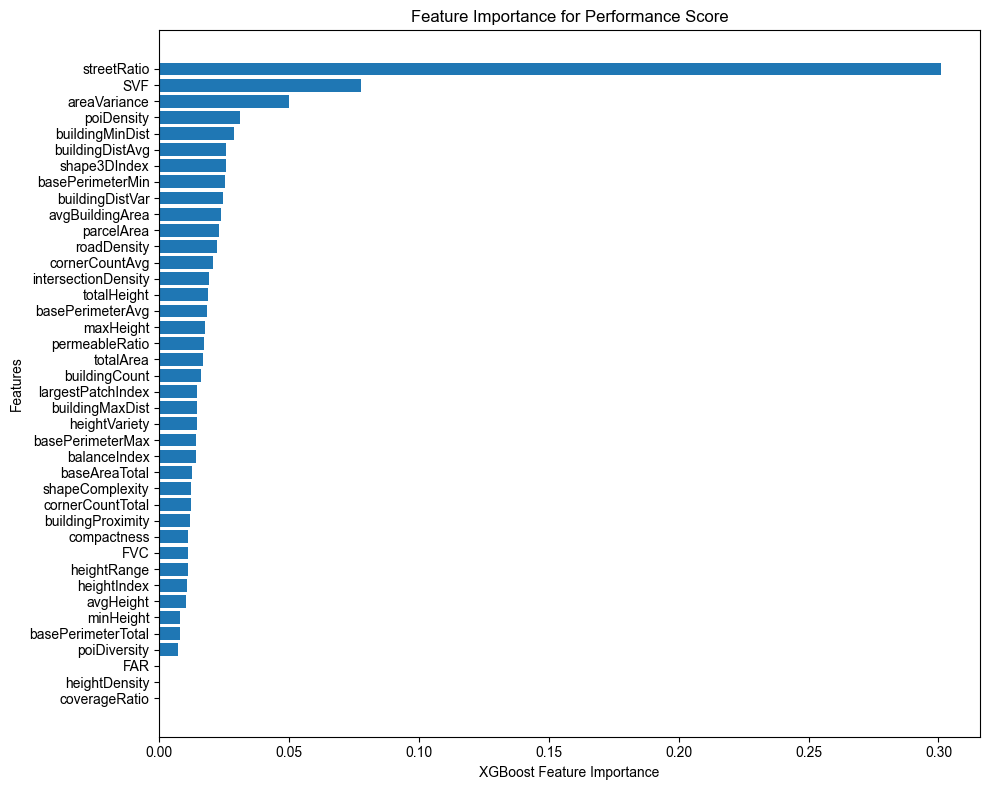

In [ ]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- 1. Data Preparation ---

# Assume 'grid500' DataFrame (with performance_score) and 'features' DataFrame are pre-loaded.
# Make sure that 'grid500' and 'features' have the same number of rows and are aligned.

# Define the target variable 'y'
y = grid500_high['performance_score']

# Define the feature matrix 'X'
# We will use your pre-loaded 'features' DataFrame.
X = grid500_high[features]

# Ensure X and y are aligned, dropping any rows with NaN in target or features
if X.shape[0] != y.shape[0]:
    print("Error: The number of rows in 'features' and 'grid500' do not match.")
    # Handle error appropriately, e.g., by exiting or trying to align them based on an index.
else:
    # --- 2. Split Data into Training and Testing Sets ---
    # We split the data to evaluate the model on unseen data.
    # test_size=0.2 means 20% of the data will be used for testing.
    # random_state ensures the split is the same every time you run the code.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows) sets.")

    # --- 3. Train XGBoost Model ---

    print("\nTraining XGBoost Regressor model...")
    # Initialize the XGBoost Regressor model with common parameters.
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                              n_estimators=100, 
                              max_depth=5, 
                              learning_rate=0.1,
                              random_state=42)

    # Train the model on the TRAINING data.
    xg_reg.fit(X_train, y_train)
    print("Model training complete.")

    # --- 4. Make Predictions and Evaluate the Model ---
    
    # Make predictions on the TEST data.
    y_pred = xg_reg.predict(X_test)
    
    # Calculate evaluation metrics.
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\n--- Model Evaluation Metrics ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")


    # --- 5. Get and Display Feature Importances ---

    # Get feature importance scores from the trained model.
    importances = xg_reg.feature_importances_

    # Create a DataFrame for better visualization.
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False) # Sort by importance

    print("\n--- Feature Importances ---")
    print(feature_importance_df)


    # --- 6. Visualize Feature Importances ---

    print("\nGenerating feature importance plot...")
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("XGBoost Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance for Performance Score")
    plt.gca().invert_yaxis() # Display the most important feature at the top
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig('feature_importance.png')
    print("Plot saved as 'feature_importance.png'.")
    
    # To display the plot in an interactive environment (like Jupyter), you would use:
    # plt.show()

# TBC:
- k values
- methods of fitting PPF
- Weight of different dimensions
- different urban form clustering
- 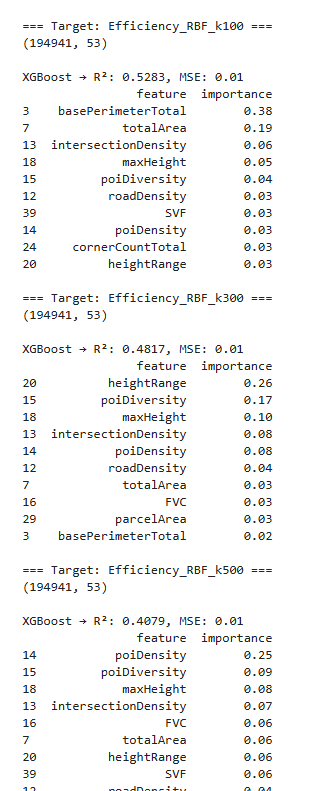

## Visualization

In [147]:
sample_data.head(5)

Global_ID     City  NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
0          0  Beijing     6.18           7.03    1649.86               0.47   
1          1  Beijing     5.74           7.23     155.86               0.47   
2          2  Beijing    11.32          13.62      57.14               0.47   
3          3  Beijing    11.73          14.36     243.57               0.47   
4          4  Beijing     8.45           9.19       0.00               0.47   

   buildingCount  totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
0             31        93.00       3.00       3.00       3.00         0.00   
1             29        87.00       3.00       3.00       3.00         0.00   
2             22        66.00       3.00       3.00       3.00         0.00   
3              8        24.00       3.00       3.00       3.00         0.00   
4              0         0.00       0.00       0.00       0.00         0.00   

   heightIndex  heightDensity  heightVariety  cornerCountTotal  \
0         0.03           0.00           0.00               180   
1         0.03           0.00           0.00               149   
2         0.05           0.00           0.00               117   
3         0.12           0.00           0.00                42   
4         0.00           0.00           0.00                 0   

   basePerimeterTotal  basePerimeterAvg  basePerimeterMax  basePerimeterMin  \
0             6500.98            209.71            831.63             32.55   
1             3810.39            131.39            272.14             15.33   
2             3645.40            165.70            668.26             28.73   
3             1147.60            143.45            283.01             75.66   
4                0.00              0.00              0.00              0.00   

   shapeComplexity  compactness  baseAreaTotal  totalArea  areaVariance  \
0             5.07         0.56       88704.58   88704.58   50961857.70   
1             5.17         0.62       33119.49   33119.49    1261729.88   
2             4.92         0.56       51092.86   51092.86   30358745.83   
3             5.70         0.60        8534.61    8534.61     958399.89   
4             0.00         0.00           0.00       0.00          0.00   

   avgBuildingArea  parcelArea  largestPatchIndex  shape3DIndex  SVF  \
0          2861.44   132998.25               0.47          0.01 0.80   
1          1142.05   196625.22               0.67          0.26 0.89   
2          2322.40   132197.31               0.53          0.01 0.90   
3          1066.83   205685.37               0.82          0.02 0.95   
4             0.00       99.15               0.00          0.00 0.98   

   balanceIndex  FAR  coverageRatio  FVC  permeableRatio  poiDensity  \
0        234.60 0.35           0.35 0.84            0.89        4.00   
1         35.66 0.13           0.13 0.86            0.94       12.00   
2        151.50 0.20           0.20 0.88            0.93        0.00   
3         15.54 0.03           0.03 0.93            0.98        0.00   
4          0.00 0.00           0.00 0.82            0.98       16.00   

   poiDiversity  streetRatio  roadDensity  intersectionDensity  \
0          0.00         0.20            5                    1   
1          0.64         0.20            7                    1   
2          0.00         0.20            1                    0   
3          0.00         0.20            3                    1   
4          0.69         0.00            1                    1   

   cornerCountAvg  buildingProximity  buildingMinDist  buildingMaxDist  \
0            5.81              52.56            14.99           620.94   
1            5.14              34.22             6.82           594.16   
2            5.32              47.90            17.34           610.84   
3            5.25              35.93            13.49           474.17   
4            0.00               0.00             0.00             0.00   

   buildingDistAvg  bu

In [150]:
sample_data['performance_score'].describe()

count   194941.00
mean         0.66
std          0.14
min          0.00
25%          0.59
50%          0.68
75%          0.76
max          1.00
Name: performance_score, dtype: float64

### Box plot - performance score

#### city level

In [ ]:
distribution = sample_data.groupby('City')['performance_score'].agg(
    [('Count', 'count'), 
     ('Mean', 'mean'),     
     ('Median', 'median'), 
     ('Std Dev', 'std'),   
     ('Min', 'min'),       
     ('Max', 'max')]       
).round(2)

distribution
distribution.to_csv("../output/performance_score_city.csv")

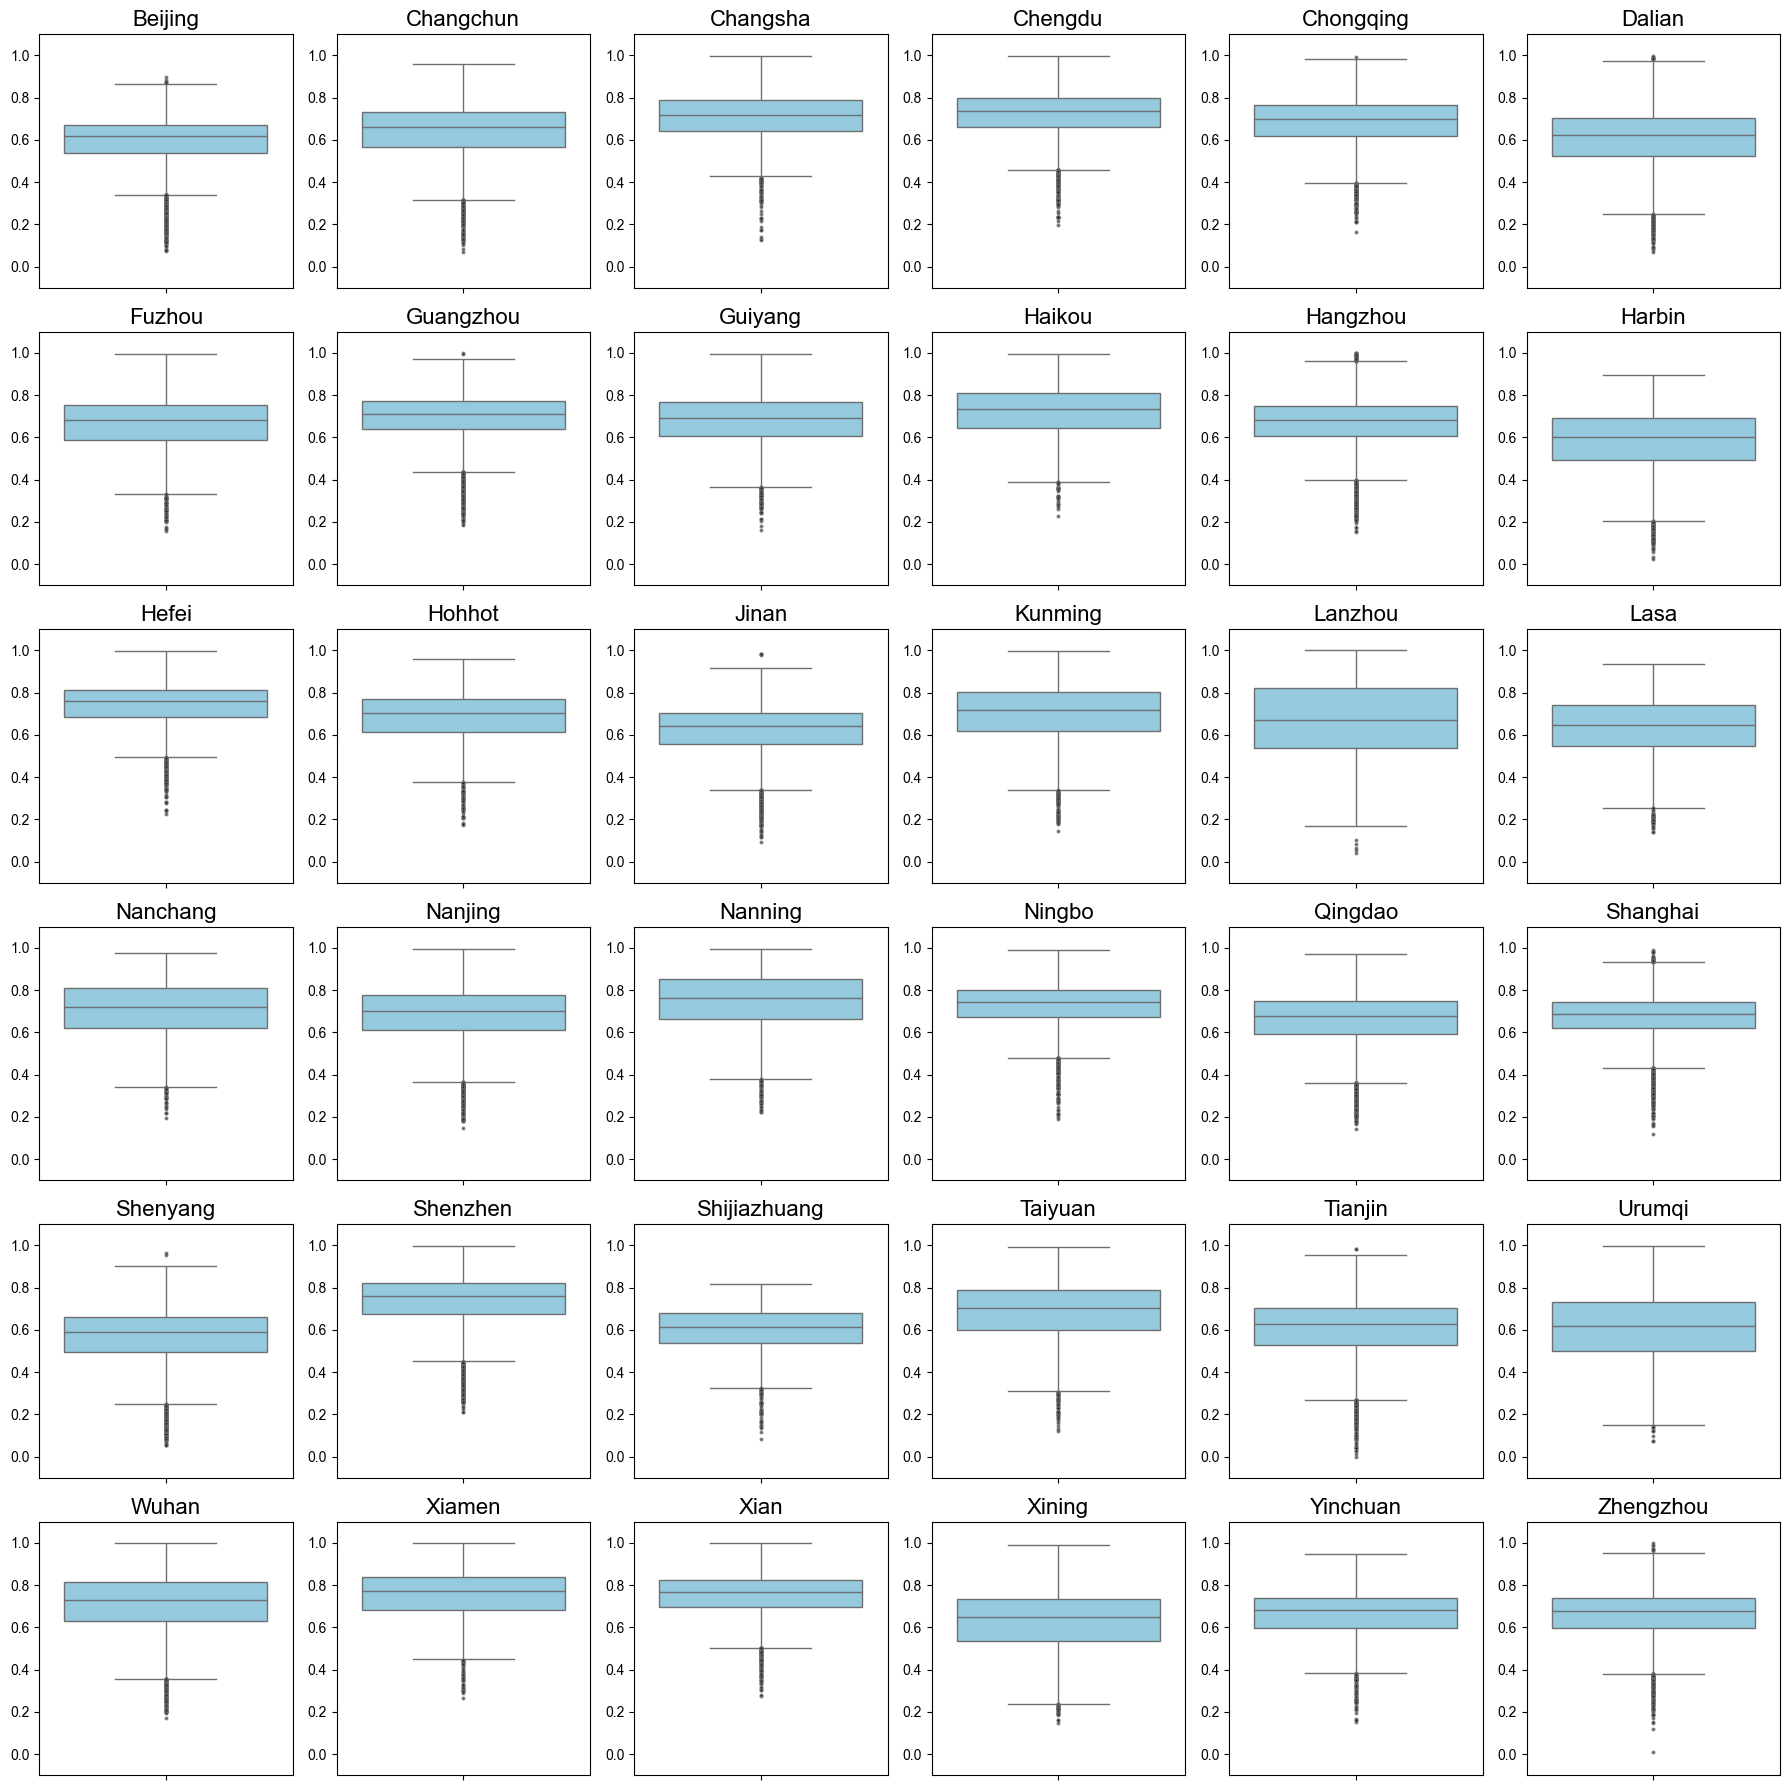

In [163]:
# 获取城市列表（排序可选：按名字或按中位数排序）
cities = sample_data['City'].unique()

# 创建 6x6 子图
fig, axes = plt.subplots(6, 6, figsize=(18, 18))
axes = axes.flatten()

# 定义离群点（Fliers）的样式
flier_style = dict(
    marker='o',          # 形状：圆形 (Circle)。可以改为 'D' (菱形), 's' (方形) 等
    markerfacecolor='black', # 填充颜色：红色
    # markeredgecolor='red', # 边缘颜色：红色
    markersize=2,        # 大小：5个单位
    linestyle='None',    # 不绘制连接线
    alpha=0.6            # 透明度：0.6
)

for i, city in enumerate(cities):
    ax = axes[i]
    sns.boxplot(
        data=sample_data[sample_data['City'] == city],
        y="performance_score",
        ax=ax,
        color="skyblue",
        showfliers=True,
        flierprops=flier_style
    )
    ax.set_title(city, fontsize=16)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_ylim(-0.1, 1.1)

# 关闭多余空子图（如果城市数不足 36）
for j in range(len(cities), 36):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### city size categories

In [168]:
import pandas as pd
import numpy as np

# --- 1. 定义城市规模映射 ---
city_categories = {
    'Super Large-Sized City': ['Beijing', 'Tianjin', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Chongqing', 'Chengdu'],
    'Very Large-Sized City': ['Shenyang', 'Harbin', 'Nanjing', 'Hangzhou', 'Jinan', 'Zhengzhou', 'Wuhan', 'Changsha', 'Kunming', 'Xi’an', 'Dalian', 'Qingdao'],
    'Type I Large-Sized City': ['Shijiazhuang', 'Taiyuan', 'Changchun', 'Hefei', 'Fuzhou', 'Nanchang', 'Nanning', 'Guiyang', 'Urumqi', 'Ningbo', 'Xiamen'],
    'Type II Large-Sized City': ['Hohhot', 'Haikou', 'Lanzhou', 'Xining', 'Yinchuan'],
    'Medium-Sized City': ['Lasa']
}

# 反向创建城市到规模的映射字典
city_to_scale = {}
for scale, cities in city_categories.items():
    for city in cities:
        city_to_scale[city] = scale

# --- 2. 将规模类别添加到 sample_data ---
# 确保 sample_data 是可用的
try:
    # 使用 map 函数创建新的 'Size Category' 列
    sample_data['Size Category'] = sample_data['City'].map(city_to_scale)
    
    # 定义排序的类别顺序 (用于图表和表格)
    scale_order = list(city_categories.keys())

except NameError:
    # 如果 sample_data 变量不存在，则打印提示信息
    print("错误: 找不到 'sample_data' DataFrame。请确保它已被加载。")
    # 为了演示后续步骤，我们创建一个虚拟的 sample_data
    np.random.seed(42)
    sample_data = pd.DataFrame({
        'City': np.random.choice(list(city_to_scale.keys()), 100),
        'performance_score': np.random.rand(100) * 100,
    })
    sample_data['Size Category'] = sample_data['City'].map(city_to_scale)
    scale_order = list(city_categories.keys())
    print("已使用虚拟数据进行演示。")
    
# 过滤掉无法匹配到规模类别的城市 (如果有的话)
df_analysis = sample_data.dropna(subset=['Size Category']).copy()

In [169]:
df_analysis.head(5)

Global_ID     City  NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
0          0  Beijing     6.18           7.03    1649.86               0.47   
1          1  Beijing     5.74           7.23     155.86               0.47   
2          2  Beijing    11.32          13.62      57.14               0.47   
3          3  Beijing    11.73          14.36     243.57               0.47   
4          4  Beijing     8.45           9.19       0.00               0.47   

   buildingCount  totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
0             31        93.00       3.00       3.00       3.00         0.00   
1             29        87.00       3.00       3.00       3.00         0.00   
2             22        66.00       3.00       3.00       3.00         0.00   
3              8        24.00       3.00       3.00       3.00         0.00   
4              0         0.00       0.00       0.00       0.00         0.00   

   heightIndex  heightDensity  heightVariety  cornerCountTotal  \
0         0.03           0.00           0.00               180   
1         0.03           0.00           0.00               149   
2         0.05           0.00           0.00               117   
3         0.12           0.00           0.00                42   
4         0.00           0.00           0.00                 0   

   basePerimeterTotal  basePerimeterAvg  basePerimeterMax  basePerimeterMin  \
0             6500.98            209.71            831.63             32.55   
1             3810.39            131.39            272.14             15.33   
2             3645.40            165.70            668.26             28.73   
3             1147.60            143.45            283.01             75.66   
4                0.00              0.00              0.00              0.00   

   shapeComplexity  compactness  baseAreaTotal  totalArea  areaVariance  \
0             5.07         0.56       88704.58   88704.58   50961857.70   
1             5.17         0.62       33119.49   33119.49    1261729.88   
2             4.92         0.56       51092.86   51092.86   30358745.83   
3             5.70         0.60        8534.61    8534.61     958399.89   
4             0.00         0.00           0.00       0.00          0.00   

   avgBuildingArea  parcelArea  largestPatchIndex  shape3DIndex  SVF  \
0          2861.44   132998.25               0.47          0.01 0.80   
1          1142.05   196625.22               0.67          0.26 0.89   
2          2322.40   132197.31               0.53          0.01 0.90   
3          1066.83   205685.37               0.82          0.02 0.95   
4             0.00       99.15               0.00          0.00 0.98   

   balanceIndex  FAR  coverageRatio  FVC  permeableRatio  poiDensity  \
0        234.60 0.35           0.35 0.84            0.89        4.00   
1         35.66 0.13           0.13 0.86            0.94       12.00   
2        151.50 0.20           0.20 0.88            0.93        0.00   
3         15.54 0.03           0.03 0.93            0.98        0.00   
4          0.00 0.00           0.00 0.82            0.98       16.00   

   poiDiversity  streetRatio  roadDensity  intersectionDensity  \
0          0.00         0.20            5                    1   
1          0.64         0.20            7                    1   
2          0.00         0.20            1                    0   
3          0.00         0.20            3                    1   
4          0.69         0.00            1                    1   

   cornerCountAvg  buildingProximity  buildingMinDist  buildingMaxDist  \
0            5.81              52.56            14.99           620.94   
1            5.14              34.22             6.82           594.16   
2            5.32              47.90            17.34           610.84   
3            5.25              35.93            13.49           474.17   
4            0.00               0.00             0.00             0.00   

   buildingDistAvg  bu

In [183]:
# 按城市规模类别分组，并计算统计量
distribution_stats = df_analysis.groupby('Size Category')['performance_score'].agg(
    [('Count', 'count'), 
     ('Mean', 'mean'),     
     ('Median', 'median'), 
     ('Std Dev', 'std'),   
     ('Min', 'min'),       
     ('Max', 'max')]       
).reindex(scale_order).round(2) # 使用预定义的顺序排序

print("\n--- 'performance_score' 按城市规模类别的分布统计 ---")
print(distribution_stats)
distribution_stats.to_csv("../output/performance_score_city_size.csv")


--- 'performance_score' 按城市规模类别的分布统计 ---
                          Count  Mean  Median  Std Dev  Min  Max
Size Category                                                   
Super Large-Sized City    71818  0.66    0.67     0.13 0.00 1.00
Very Large-Sized City     68375  0.65    0.67     0.14 0.01 1.00
Type I Large-Sized City   38366  0.68    0.70     0.15 0.07 1.00
Type II Large-Sized City  10173  0.67    0.69     0.16 0.04 1.00
Medium-Sized City          1025  0.62    0.65     0.17 0.14 0.94


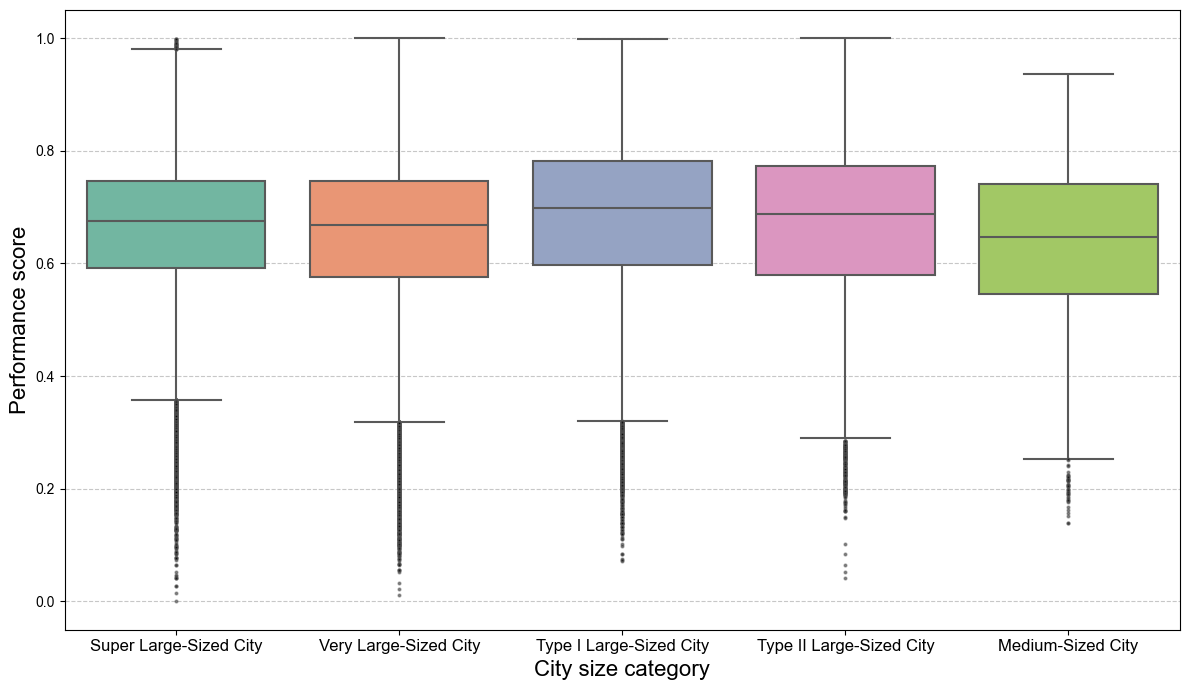

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

sns.boxplot(
    x='Size Category', 
    y='performance_score', 
    data=df_analysis,
    order=scale_order, # 确保按规模从大到小排序
    palette='Set2',
    linewidth=1.5,
    flierprops=dict(marker='o', markersize=2, markerfacecolor='black', alpha=0.5) # 使用自定义离群点样式
)

# plt.title('Performance Score Distribution by City Size Category', fontsize=14)
plt.xlabel('City size category', fontsize=16)
plt.ylabel('Performance score', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()